In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

In [3]:
import os
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from main import get_args
from rxnscribe.dataset import ReactionDataset
from rxnscribe.tokenizer import get_tokenizer
import torchvision.transforms.functional as F

args = get_args(notebook=True)
args.format = 'bbox'
args.pix2seq = True
args.data_path = ''
args.image_path = '../data/detect/images'
args.train_file = 'annotations_dec.json'
args.num_train_example = None
args.augment = True
args.composite_augment = True
args.rand_order = True

tokenizer = get_tokenizer(args)
train_dataset = ReactionDataset(args, tokenizer, '../data/coref/splits/annotations/coref_redo_test.json', split='train', debug=True)

In [6]:
image, target = train_dataset.load_and_prepare(0)

print(target)

{'id': 7, 'width': 1356, 'height': 500, 'file_name': 'jacs.5b05415-Figure-c6.png', 'license': 0, 'bboxes': [{'id': 0, 'bbox': [797.21, 451.89, 142.27, 39.23], 'category_id': 3}, {'id': 1, 'bbox': [315.77, 372.22, 326.71, 89.46], 'category_id': 2}, {'id': 2, 'bbox': [360.79, 267.45, 239.26, 85.13], 'category_id': 2}, {'id': 3, 'bbox': [368.59, 148.82, 221.94, 46.16], 'category_id': 2}, {'id': 4, 'bbox': [360.79, 44.91, 239.26, 85.13], 'category_id': 2}, {'id': 5, 'bbox': [715.81, 274.38, 299.01, 167.38], 'category_id': 1}, {'id': 6, 'bbox': [18.76, 293.43, 239.24, 128.42], 'category_id': 1}, {'id': 7, 'bbox': [724.47, 55.3, 299.01, 170.86], 'category_id': 1}, {'id': 8, 'bbox': [17.03, 57.9, 238.39, 166.52], 'category_id': 1}, {'id': 9, 'bbox': [1036.2, 119.38, 304.19, 79.07], 'category_id': 3}, {'id': 10, 'bbox': [1089.88, 276.11, 229.73, 165.65], 'category_id': 1}, {'id': 11, 'bbox': [1123.65, 451.89, 159.6, 39.23], 'category_id': 3}], 'reactions': [{'reactants': [8], 'conditions': [4,

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[7, 9], [5, 0], [10, 11]]
tensor([False])
tensor([False])
tensor([False])
[tensor([ 715.8100,  274.3800, 1014.8200,  441.7600]), tensor([797.2100, 451.8900, 939.4800, 491.1200]), tensor([ 18.7600, 293.4300, 258.0000, 421.8500]), tensor([ 724.4700,   55.3000, 1023.4800,  226.1600]), tensor([1036.2000,  119.3800, 1340.3899,  198.4500]), tensor([ 17.0300,  57.9000, 255.4200, 224.4200]), tensor([1089.8800,  276.1100, 1319.6100,  441.7600]), tensor([1123.6500,  451.8900, 1283.2500,  491.1200])]
[tensor(1), tensor(3), tensor(1), tensor(1), tensor(3), tensor(1), tensor(1), tensor(3)]
[tensor([ 17.0300,  57.9000, 255.4200, 224.4200]), tensor([ 18.7600, 293.4300, 258.0000, 421.8500]), tensor([ 715.8100,  274.3800, 1014.8200,  441.7600]), tensor([797.2100, 451.8900, 939.4800, 491.1200]), tensor([ 724.4700,   5

/tmp/ipykernel_4181167/502040518.py:13: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  numbuckets = int(maxy//500 + 1)
/tmp/ipykernel_4181167/502040518.py:20: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  buckets[int(bbox_group[0][0][1]//500)].append(bbox_group)


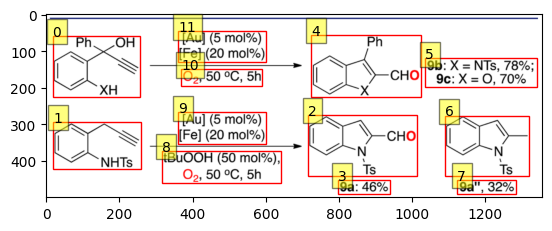

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[17, 1], [14, 21], [13, 20], [16, 19], [12, 4], [15, 18], [11, 5]]
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
[tensor([ 160.1900,  865.6300,  392.4200, 1079.6200]), tensor([ 243.0200, 1042.5200,  309.5900, 1083.8000]), tensor([745.6000, 344.8000, 977.8400, 558.7800]), tensor([732.9700, 531.5100, 887.9900, 578.4300]), tensor([1082.5300,   96.3100, 1313.3600,  262.5600]), tensor([1114.8199,  268.9900, 1279.6699,  313.1000]), tensor([745.6000,  96.3100, 979.2400, 263.9700]), tensor([ 716.1200,  268.9900, 1005.9100,  313.1000]), tensor([ 11.3800, 611.5300, 250.6300, 777.7900]), tensor([101.2200, 781.4000, 159.3800, 824.1100]), tensor([ 11.3800, 365.8500, 252.0400, 532.1100]), tensor([101.2200, 531.5100, 158.0000, 575.6300]), tensor([ 11

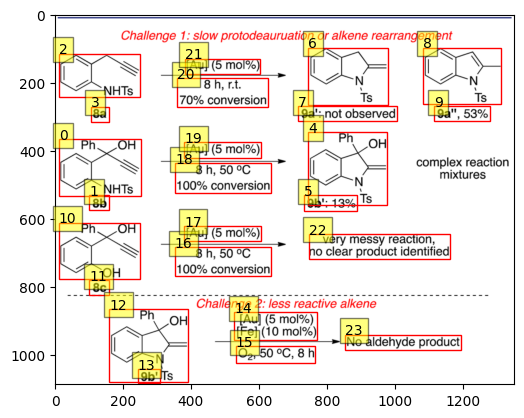

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[]
[tensor([ 51.4100, 500.9500, 385.1400, 611.4000]), tensor([ 451.1900,  429.7100, 1107.0701,  815.5300]), tensor([ 653.2000,    5.4800, 1160.2300,  357.2800]), tensor([  5.7000,  15.0500, 340.4800, 356.2200])]
[tensor(1), tensor(1), tensor(1), tensor(1)]
[tensor([  5.7000,  15.0500, 340.4800, 356.2200]), tensor([ 451.1900,  429.7100, 1107.0701,  815.5300]), tensor([ 653.2000,    5.4800, 1160.2300,  357.2800]), tensor([ 51.4100, 500.9500, 385.1400, 611.4000]), tensor([421.4200, 220.2500, 580.7700, 255.2100]), tensor([364.0000, 119.2500, 630.7500, 155.2700])]
[tensor(1), tensor(1), tensor(1), tensor(1), tensor(2), tensor(2)]
tensor(5.7000) tensor(15.0500)
tensor(451.1900) tensor(429.7100)
tensor(653.2000) tensor(5.4800)
tensor(51.4100) tensor(500.9500)
tensor(421.4200) tensor(220.2500)
tensor(364.) te

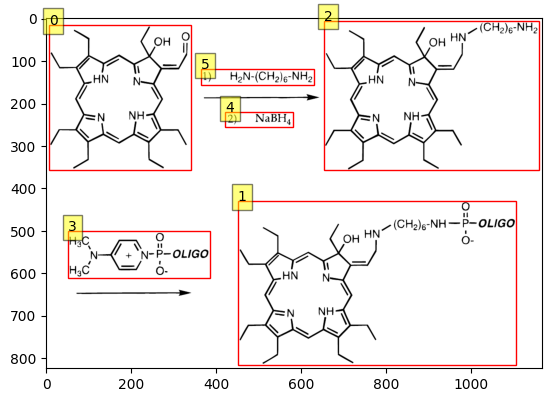

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[6, 11], [3, 10]]
tensor([False])
tensor([False])
[tensor([ 137.1200, 1363.8000,  797.7400, 1629.6700]), tensor([ 445.3200,  895.1600, 1099.6100, 1329.9099]), tensor([1038.4399,  890.3100, 1064.2200,  924.0200]), tensor([ 27.3500, 570.0800, 356.5500, 745.1700]), tensor([ 626.8600,  154.2100, 1067.9399,  588.9600]), tensor([1040.4200,  154.6100, 1066.2001,  180.3800]), tensor([413.6500, 240.7600, 628.8600, 337.7600]), tensor([ 10.4600, 122.5500, 358.6600, 517.1900]), tensor([  93.2000,  996.4900,  428.3200, 1104.0400])]
[tensor(1), tensor(1), tensor(3), tensor(1), tensor(1), tensor(3), tensor(1), tensor(1), tensor(1)]
[tensor([ 10.4600, 122.5500, 358.6600, 517.1900]), tensor([413.6500, 240.7600, 628.8600, 337.7600]), tensor([ 626.8600,  154.2100, 1067.9399,  588.9600]), tensor([1040.4200,  154.6100, 1

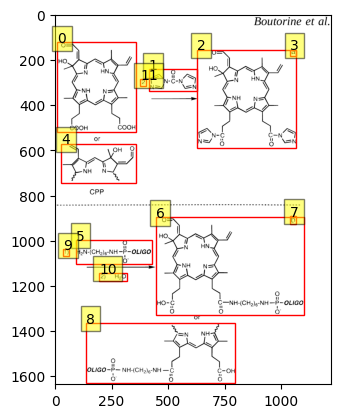

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[]
[tensor([523.3500, 309.9500, 828.5800, 552.5500]), tensor([ 522.5900,  689.5600,  866.7700, 1066.5900]), tensor([690.6300, 565.0600, 858.3700, 683.9200]), tensor([460.7200, 565.0600, 628.4700, 683.9200]), tensor([ 25.3600, 225.9300, 330.5900, 553.3100]), tensor([1015.2400,  206.0700, 1320.4700,  552.5500]), tensor([391.2200,   2.9000, 911.0699, 155.3700]), tensor([  29.5300, 1144.9100, 1322.2800, 1813.3501])]
[tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
[tensor([ 25.3600, 225.9300, 330.5900, 553.3100]), tensor([391.2200,   2.9000, 911.0699, 155.3700]), tensor([523.3500, 309.9500, 828.5800, 552.5500]), tensor([1015.2400,  206.0700, 1320.4700,  552.5500]), tensor([460.7200, 565.0600, 628.4700, 683.9200]), tensor([ 522.5900,  689.5600,  866.7700, 1066.5900])

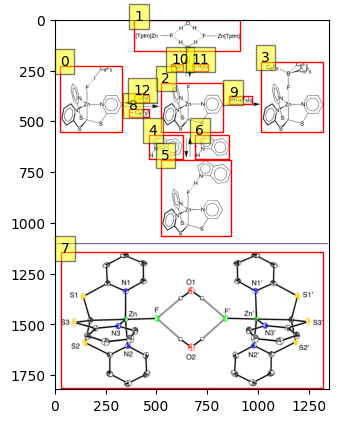

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[]
[tensor([ 995.0900,    6.1600, 1328.4200,  269.7300]), tensor([463.2200,   6.1600, 797.8000, 269.7300]), tensor([ 23.5300,   4.9100, 288.9700, 409.8600]), tensor([ 158.2400,  805.8000, 1196.1400, 1476.7500]), tensor([461.9800, 470.7600, 794.6801, 729.9700])]
[tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
[tensor([ 23.5300,   4.9100, 288.9700, 409.8600]), tensor([461.9800, 470.7600, 794.6801, 729.9700]), tensor([463.2200,   6.1600, 797.8000, 269.7300]), tensor([ 995.0900,    6.1600, 1328.4200,  269.7300]), tensor([ 158.2400,  805.8000, 1196.1400, 1476.7500]), tensor([853.0900,  79.0200, 970.3101, 118.3900]), tensor([308.7700, 142.5500, 411.6600, 181.2900]), tensor([299.4300,  72.8000, 414.1600, 110.9200]), tensor([622.0400, 340.6000, 913.0100, 419.8200]), tensor([433.3300, 341.2200, 574.840

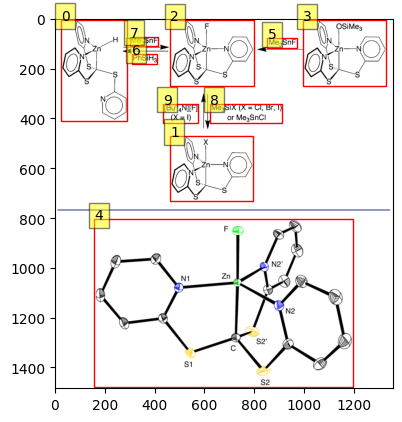

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[7, 8], [5, 0]]
tensor([False])
tensor([False])
[tensor([ 966.4300,   46.1600, 1303.2800,  255.6100]), tensor([1056.8101,  267.3800, 1148.3401,  302.9500]), tensor([235.6200,  84.0300, 538.9000, 194.4900]), tensor([ 44.5200,   4.8400, 195.4400, 253.8900]), tensor([ 68.6300, 267.3800, 110.2200, 301.2300])]
[tensor(1), tensor(3), tensor(1), tensor(1), tensor(3)]
[tensor([ 44.5200,   4.8400, 195.4400, 253.8900]), tensor([ 68.6300, 267.3800, 110.2200, 301.2300]), tensor([235.6200,  84.0300, 538.9000, 194.4900]), tensor([ 966.4300,   46.1600, 1303.2800,  255.6100]), tensor([1056.8101,  267.3800, 1148.3401,  302.9500]), tensor([333.7500, 211.4300, 432.1600, 251.3100]), tensor([652.2400, 163.2300, 772.1700, 201.3800]), tensor([591.1300,  51.3200, 861.6900, 141.1200])]
[tensor(1), tensor(3), tensor(1), tenso

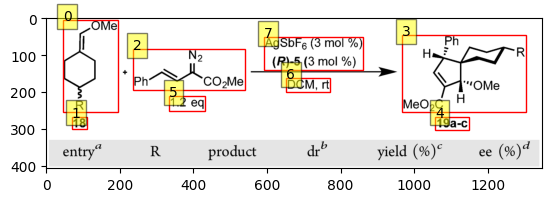

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[4, 7], [3, 0]]
tensor([False])
tensor([False])
[tensor([302.9900,  10.2100, 532.7000, 175.8800]), tensor([443.2800, 145.4200, 464.5900, 175.8800]), tensor([ 70.1900,   4.1100, 213.4900, 173.8500]), tensor([142.3700, 146.4300, 223.6600, 183.0000]), tensor([ 853.9800,   15.2900, 1174.1699,  184.0100])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1)]
[tensor([ 70.1900,   4.1100, 213.4900, 173.8500]), tensor([142.3700, 146.4300, 223.6600, 183.0000]), tensor([302.9900,  10.2100, 532.7000, 175.8800]), tensor([443.2800, 145.4200, 464.5900, 175.8800]), tensor([ 853.9800,   15.2900, 1174.1699,  184.0100]), tensor([630.3300, 103.7400, 784.8200, 192.1500]), tensor([650.6600,  38.6700, 752.2900,  70.1500])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(2), tensor(2)]
tensor(70.1900) ten

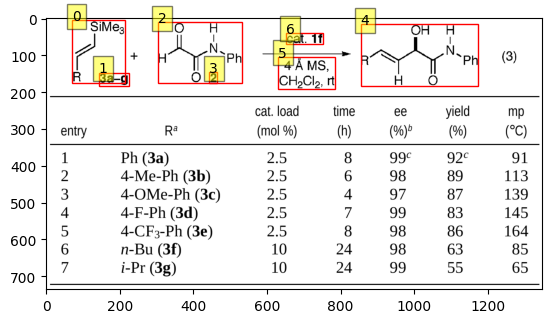

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[]
[tensor([232.9900,  11.3000, 391.6600, 135.3900]), tensor([ 965.4800,    8.2500, 1124.2000,  133.3500])]
[tensor(1), tensor(1)]
[tensor([232.9900,  11.3000, 391.6600, 135.3900]), tensor([ 965.4800,    8.2500, 1124.2000,  133.3500]), tensor([474.1000,  15.3700, 900.3400, 106.9000]), tensor([511.7400, 150.6800, 820.9800, 191.3400])]
[tensor(1), tensor(1), tensor(2), tensor(2)]
tensor(232.9900) tensor(11.3000)
tensor(965.4800) tensor(8.2500)
tensor(474.1000) tensor(15.3700)
tensor(511.7400) tensor(150.6800)


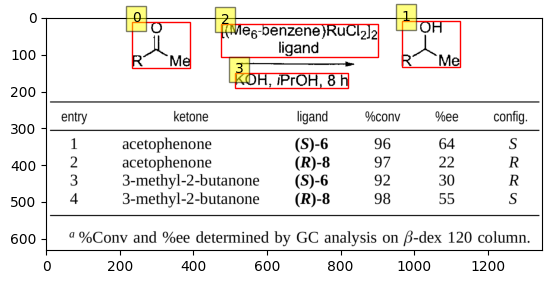

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[5, 3], [4, 2]]
tensor([False])
tensor([False])
[tensor([1026.5500,    6.1300, 1246.6400,  179.5500]), tensor([1136.1000,  203.9200, 1158.3900,  236.3500]), tensor([ 97.4200,   5.1100, 397.6400, 178.5400]), tensor([175.5200, 202.9100, 198.8000, 236.3600])]
[tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([ 97.4200,   5.1100, 397.6400, 178.5400]), tensor([175.5200, 202.9100, 198.8000, 236.3600]), tensor([1026.5500,    6.1300, 1246.6400,  179.5500]), tensor([1136.1000,  203.9200, 1158.3900,  236.3500]), tensor([520.4000,  31.4900, 723.2400,  73.0500]), tensor([826.7300,  33.5200, 961.6100,  68.9900]), tensor([480.8400, 111.6200, 748.6000, 185.6400])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(2), tensor(2), tensor(2)]
tensor(97.4200) tensor(5.1100)
tensor(175.5200) tensor(202.9100)
tensor(

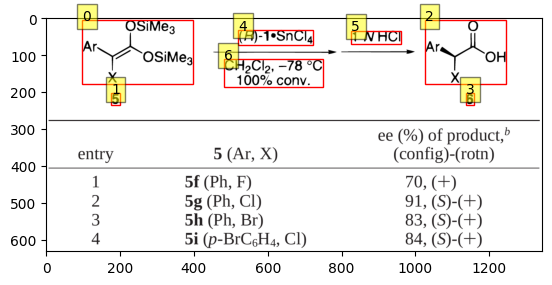

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[5, 8], [4, 7], [2, 9], [16, 13], [3, 12], [1, 0], [11, 10]]
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
[tensor([ 709.0000,  932.7000,  831.0000, 1129.0000]), tensor([ 831.0000, 1019.4000,  873.8000, 1068.0000]), tensor([241.5000, 379.6000, 365.0000, 570.5000]), tensor([369., 464., 403., 522.]), tensor([ 609.1000,  628.8000, 1012.0000,  820.3000]), tensor([777., 828., 854., 888.]), tensor([650.0000,  81.2000, 939.2000, 307.7000]), tensor([757., 272., 826., 325.]), tensor([ 75.8000,  78.5000, 364.5000, 305.3000]), tensor([171., 271., 237., 326.]), tensor([ 293., 1149.,  621., 1384.]), tensor([ 410., 1419.,  464., 1472.]), tensor([ 55., 610., 385., 822.]), tensor([172., 846., 223., 896.])]
[tensor(1), tensor(3), tensor(1), tensor(3), 

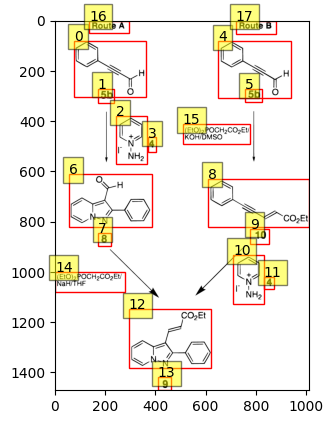

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[4, 1], [5, 0], [6, 3]]
tensor([False])
tensor([False])
tensor([False])
[tensor([  0.0000,   4.0000, 356.0000, 321.9000]), tensor([213., 218., 270., 278.]), tensor([598.8000,   6.0000, 954.0000, 320.7000]), tensor([816., 218., 887., 289.]), tensor([ 928.0000,    3.0000, 1327.3000,  314.0000]), tensor([1284.,  222., 1352.,  285.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([  0.0000,   4.0000, 356.0000, 321.9000]), tensor([213., 218., 270., 278.]), tensor([598.8000,   6.0000, 954.0000, 320.7000]), tensor([816., 218., 887., 289.]), tensor([ 928.0000,    3.0000, 1327.3000,  314.0000]), tensor([1284.,  222., 1352.,  285.]), tensor([367.0000,  26.5000, 583.7000, 118.0000]), tensor([396.0000, 124.0000, 550.0000, 178.5000])]
[tensor(1), tensor(3), tensor(1), tensor(3), tenso

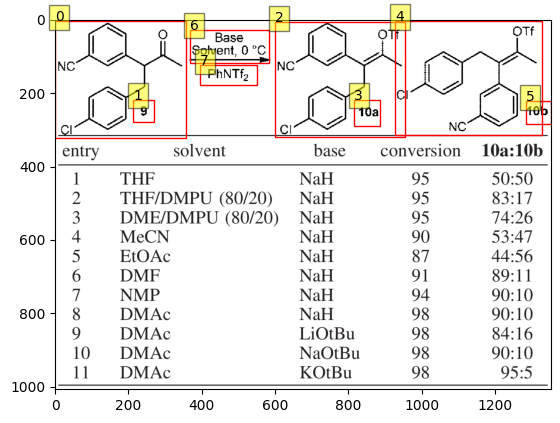

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[0, 6], [2, 4]]
tensor([False])
tensor([False])
[tensor([240.2000,  19.0000, 519.0000, 270.3000]), tensor([345., 230., 399., 270.]), tensor([ 841.8000,   19.0000, 1113.0000,  221.9000]), tensor([ 937.,  227., 1001.,  278.])]
[tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([240.2000,  19.0000, 519.0000, 270.3000]), tensor([345., 230., 399., 270.]), tensor([ 841.8000,   19.0000, 1113.0000,  221.9000]), tensor([ 937.,  227., 1001.,  278.]), tensor([528.0000, 117.0000, 785.0000, 189.8000]), tensor([512.,   2., 785.,  89.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(2), tensor(2)]
tensor(240.2000) tensor(19.)
tensor(345.) tensor(230.)
tensor(841.8000) tensor(19.)
tensor(937.) tensor(227.)
tensor(528.) tensor(117.)
tensor(512.) tensor(2.)


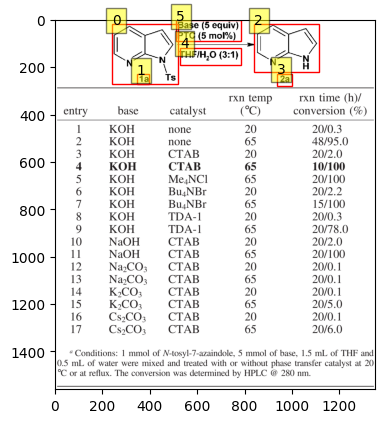

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[6, 4], [7, 2], [3, 1]]
tensor([False])
tensor([False])
tensor([False])
[tensor([1729.,    3., 1940.,  259.]), tensor([1798.,  274., 1859.,  328.]), tensor([ 878.,    0., 1080.,  265.]), tensor([ 911.,  274., 1044.,  325.]), tensor([1140.,    0., 1334.,  259.]), tensor([1153.,  268., 1325.,  334.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([ 878.,    0., 1080.,  265.]), tensor([ 911.,  274., 1044.,  325.]), tensor([1140.,    0., 1334.,  259.]), tensor([1153.,  268., 1325.,  334.]), tensor([1729.,    3., 1940.,  259.]), tensor([1798.,  274., 1859.,  328.]), tensor([1499.3700,   63.5400, 1577.9399,  127.2600])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(2)]
tensor(878.) tensor(0.)
tensor(911.) tensor(274.)
tensor(1140.) tensor(0.)
tensor(

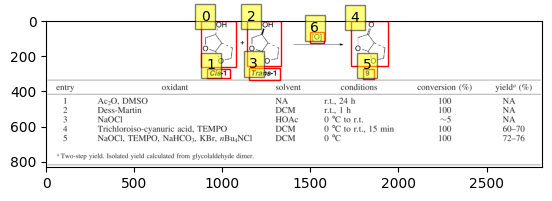

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[]
[tensor([ 147., 1150.,  437., 1248.]), tensor([ 134.,  997.,  434., 1099.]), tensor([ 968.1000,  992.0000, 1250.0000, 1248.0000]), tensor([ 555., 1036.,  845., 1109.])]
[tensor(1), tensor(1), tensor(1), tensor(1)]
[tensor([ 134.,  997.,  434., 1099.]), tensor([ 968.1000,  992.0000, 1250.0000, 1248.0000]), tensor([ 147., 1150.,  437., 1248.]), tensor([ 555., 1036.,  845., 1109.])]
[tensor(1), tensor(1), tensor(1), tensor(1)]
tensor(134.) tensor(997.)
tensor(968.1000) tensor(992.)
tensor(147.) tensor(1150.)
tensor(555.) tensor(1036.)


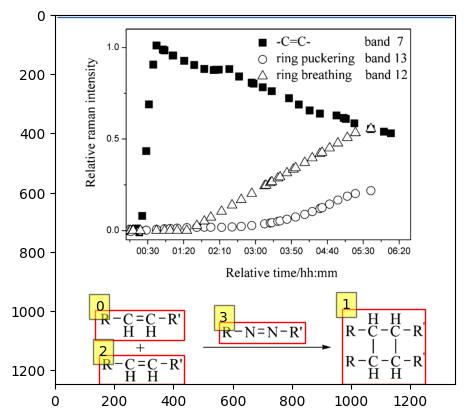

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[5, 8], [5, 7]]
tensor([False, False])
[tensor([  1., 200., 181., 329.]), tensor([465., 199., 791., 380.]), tensor([ 830.0000,  236.0000, 1018.4000,  274.9000]), tensor([ 828.0000,  279.4800, 1010.9300,  319.1400]), tensor([192.,   3., 519., 174.])]
[tensor(1), tensor(1), tensor(3), tensor(3), tensor(1)]
[tensor([  1., 200., 181., 329.]), tensor([192.,   3., 519., 174.]), tensor([465., 199., 791., 380.]), tensor([ 830.0000,  236.0000, 1018.4000,  274.9000]), tensor([ 828.0000,  279.4800, 1010.9300,  319.1400]), tensor([1061.,  246., 1238.,  298.]), tensor([285., 290., 416., 329.]), tensor([293., 202., 394., 238.])]
[tensor(1), tensor(1), tensor(1), tensor(3), tensor(3), tensor(2), tensor(2), tensor(2)]
tensor(1.) tensor(200.)
tensor(192.) tensor(3.)
tensor(465.) tensor(199.)
tensor(830.) tensor(236.)

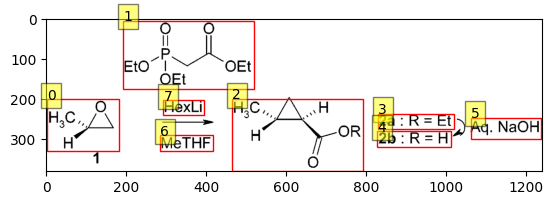

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[0, 5], [1, 6], [11, 9], [10, 4]]
tensor([False])
tensor([False])
tensor([False])
tensor([False])
[tensor([  0.0000,   5.9000, 342.2000, 225.0000]), tensor([127.8800, 226.9600, 215.8800, 281.9600]), tensor([ 936.6000,    2.0000, 1281.3999,  226.3000]), tensor([1068.9399,  242.0200, 1194.9399,  297.0200]), tensor([ 961.,  352., 1300.,  575.]), tensor([1064.1000,  597.9000, 1183.0000,  649.0000]), tensor([ 15., 344., 248., 660.]), tensor([276.0600, 600.0200, 355.0600, 655.0200])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([  0.0000,   5.9000, 342.2000, 225.0000]), tensor([127.8800, 226.9600, 215.8800, 281.9600]), tensor([ 15., 344., 248., 660.]), tensor([276.0600, 600.0200, 355.0600, 655.0200]), tensor([ 936.6000,    2.0000, 1281.3999,  226.3000]), 

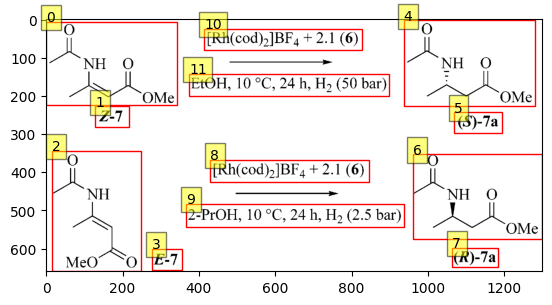

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[5, 1], [11, 8], [9, 6], [4, 0]]
tensor([False])
tensor([False])
tensor([False])
tensor([False])
[tensor([652., 518., 988., 956.]), tensor([ 818.,  970.,  864., 1010.]), tensor([  0., 393., 246., 705.]), tensor([112., 730., 157., 774.]), tensor([266.4200, 500.8300, 504.3600, 552.2400]), tensor([1075.3000,   69.0000, 1317.1001,  386.0000]), tensor([1190.,  420., 1235.,  466.]), tensor([537.9000,   6.0000, 908.8000, 494.0000]), tensor([777.5600, 345.1400, 840.7100, 395.0800]), tensor([267.0000, 447.0000, 503.0000, 490.2000])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1)]
[tensor([  0., 393., 246., 705.]), tensor([112., 730., 157., 774.]), tensor([267.0000, 447.0000, 503.0000, 490.2000]), tensor([537.9000,   6.0000, 908.8000, 494.0000]), t

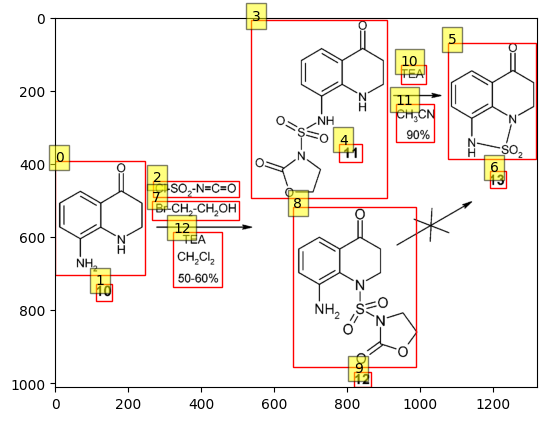

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[4, 3], [6, 2]]
tensor([False])
tensor([False])
[tensor([141.0000, 108.0000, 475.0000, 269.9000]), tensor([285.0200, 262.6000, 330.8500, 319.5800]), tensor([ 876.,    0., 1211.,  413.]), tensor([1140.9000,  234.1200, 1187.9700,  288.6100]), tensor([527.,  43., 854., 199.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1)]
[tensor([141.0000, 108.0000, 475.0000, 269.9000]), tensor([285.0200, 262.6000, 330.8500, 319.5800]), tensor([527.,  43., 854., 199.]), tensor([ 876.,    0., 1211.,  413.]), tensor([1140.9000,  234.1200, 1187.9700,  288.6100]), tensor([655.1400, 116.0900, 809.2400, 170.4000]), tensor([536., 224., 913., 266.])]
[tensor(1), tensor(3), tensor(1), tensor(1), tensor(3), tensor(2), tensor(2)]
tensor(141.) tensor(108.)
tensor(285.0200) tensor(262.6000)
tensor(527.) tensor(43.)
tensor

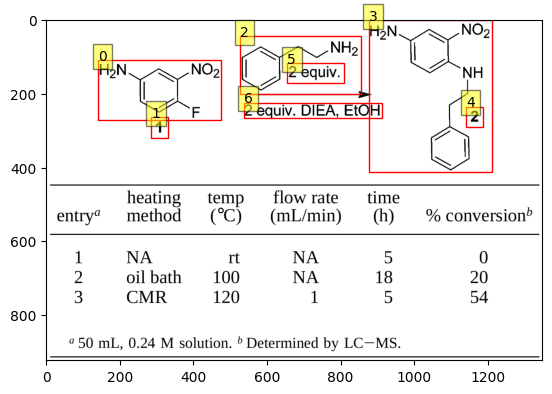

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[6, 3], [5, 1], [5, 0], [11, 7], [2, 20], [10, 4], [9, 21], [8, 22]]
tensor([False])
tensor([False, False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
[tensor([ 553.,  372., 1042.,  695.]), tensor([686.5000, 675.0000, 732.0000, 722.0000]), tensor([ 563.0000,    0.0000, 1055.0000,  323.9000]), tensor([708., 297., 829., 332.]), tensor([705., 341., 903., 375.]), tensor([ 21.5000,   3.0000, 468.0000, 308.0000]), tensor([132., 288., 205., 346.]), tensor([ 780.,  777., 1225., 1097.]), tensor([ 917.0200, 1090.9000, 1114.4000, 1158.9700]), tensor([ 383.0000,  777.0000,  834.0000, 1095.4000]), tensor([ 541.0000, 1087.4000,  713.4000, 1165.0000]), tensor([   0.,  773.,  446., 1087.]), tensor([ 140.0900, 1082.0000,  188.9900, 1128.5000]), tensor([ 16.5600, 366.5000, 512.0000

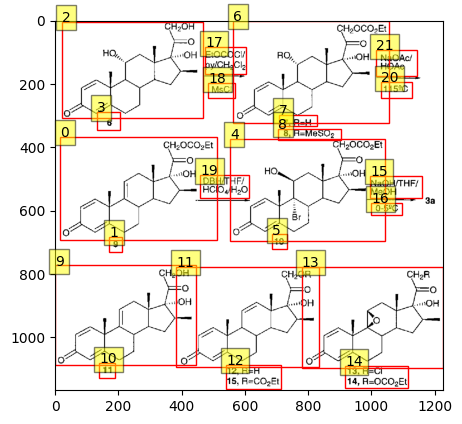

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[0, 4], [9, 5], [8, 6], [1, 7]]
tensor([False])
tensor([False])
tensor([False])
tensor([False])
[tensor([ 77., 541., 304., 719.]), tensor([247., 742., 280., 779.]), tensor([ 909.,  706., 1218.,  883.]), tensor([1139.,  863., 1174.,  903.]), tensor([1052.,  541., 1271.,  719.]), tensor([1225.,  744., 1251.,  779.]), tensor([679., 541., 973., 717.]), tensor([827., 742., 856., 781.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([ 77., 541., 304., 719.]), tensor([247., 742., 280., 779.]), tensor([679., 541., 973., 717.]), tensor([827., 742., 856., 781.]), tensor([ 909.,  706., 1218.,  883.]), tensor([1139.,  863., 1174.,  903.]), tensor([1052.,  541., 1271.,  719.]), tensor([1225.,  744., 1251.,  779.]), tensor([399., 596., 600., 642.]), tensor([318., 

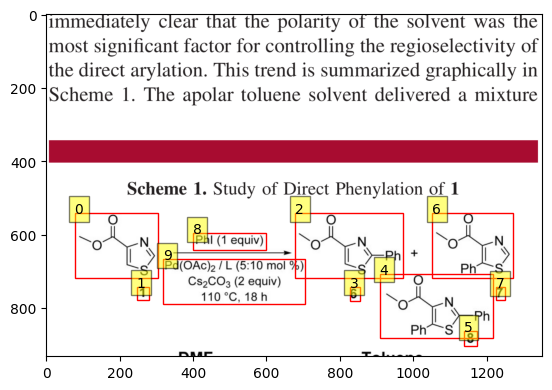

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[3, 2], [3, 1]]
tensor([False, False])
[tensor([465.0000,   0.0000, 991.7000, 386.0000]), tensor([ 876.,  143., 1328.,  201.]), tensor([ 884.,  340., 1237.,  394.])]
[tensor(1), tensor(3), tensor(3)]
[tensor([465.0000,   0.0000, 991.7000, 386.0000]), tensor([ 876.,  143., 1328.,  201.]), tensor([ 884.,  340., 1237.,  394.]), tensor([ 939.0000,  217.0000, 1224.0000,  310.3000]), tensor([101.0000, 108.0000, 450.0000, 218.8000])]
[tensor(1), tensor(3), tensor(3), tensor(2), tensor(2)]
tensor(465.) tensor(0.)
tensor(876.) tensor(143.)
tensor(884.) tensor(340.)
tensor(939.) tensor(217.)
tensor(101.) tensor(108.)


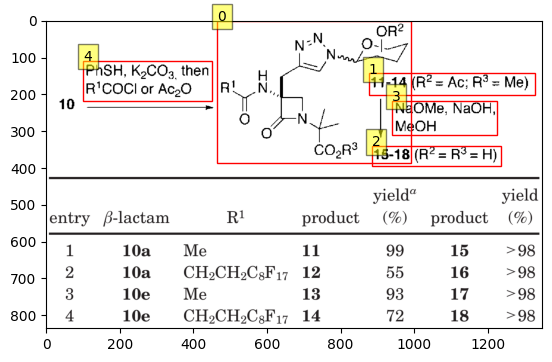

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[0, 1], [4, 3]]
tensor([False])
tensor([False])
[tensor([ 71.3700,   3.2500, 574.5000, 368.1000]), tensor([335.0000, 314.0000, 389.9000, 366.9000]), tensor([ 767.8700,    2.3800, 1279.8000,  366.2000]), tensor([1046.1300,  316.0000, 1093.9301,  364.0000])]
[tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([ 71.3700,   3.2500, 574.5000, 368.1000]), tensor([335.0000, 314.0000, 389.9000, 366.9000]), tensor([ 767.8700,    2.3800, 1279.8000,  366.2000]), tensor([1046.1300,  316.0000, 1093.9301,  364.0000]), tensor([539., 327., 780., 400.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(2)]
tensor(71.3700) tensor(3.2500)
tensor(335.) tensor(314.)
tensor(767.8700) tensor(2.3800)
tensor(1046.1300) tensor(316.)
tensor(539.) tensor(327.)


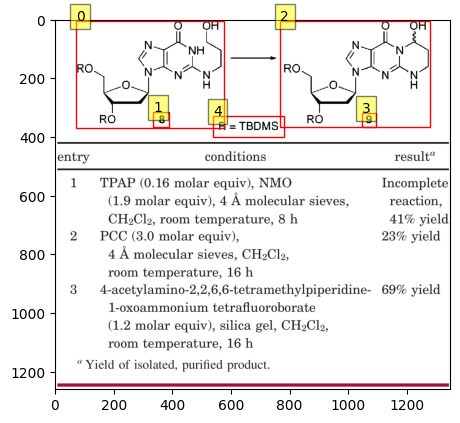

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[0, 6], [4, 1]]
tensor([False])
tensor([False])
[tensor([170.,   0., 452., 243.]), tensor([242., 247., 292., 302.]), tensor([ 886.,   30., 1172.,  242.]), tensor([1025.,  250., 1068.,  296.])]
[tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([170.,   0., 452., 243.]), tensor([242., 247., 292., 302.]), tensor([ 886.,   30., 1172.,  242.]), tensor([1025.,  250., 1068.,  296.]), tensor([485., 173., 827., 220.]), tensor([510., 108., 801., 164.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(2), tensor(2)]
tensor(170.) tensor(0.)
tensor(242.) tensor(247.)
tensor(886.) tensor(30.)
tensor(1025.) tensor(250.)
tensor(485.) tensor(173.)
tensor(510.) tensor(108.)


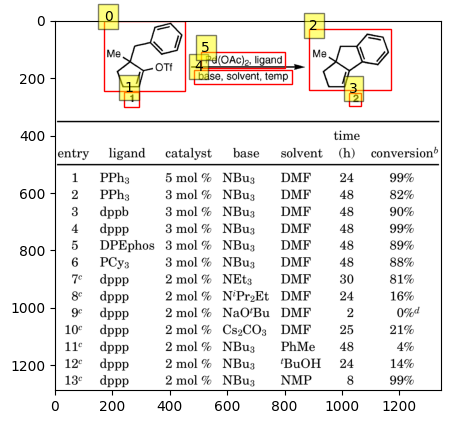

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[0, 10], [13, 1], [12, 9], [6, 8]]
tensor([False])
tensor([False])
tensor([False])
tensor([False])
[tensor([ 38.0000, 231.8000, 278.6000, 338.8000]), tensor([146., 364., 193., 408.]), tensor([189.,   6., 341., 133.]), tensor([ 669.,  133., 1312.,  385.]), tensor([ 963.,  367., 1015.,  406.]), tensor([ 873.,    0., 1163.,  133.]), tensor([536.0900, 217.6200, 753.5900, 336.7200]), tensor([585., 367., 635., 406.]), tensor([284.9400, 194.3100, 525.7400, 341.9000]), tensor([381., 367., 434., 409.])]
[tensor(1), tensor(3), tensor(1), tensor(1), tensor(3), tensor(1), tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([ 38.0000, 231.8000, 278.6000, 338.8000]), tensor([146., 364., 193., 408.]), tensor([189.,   6., 341., 133.]), tensor([284.9400, 194.3100, 525.7400, 341.9000]), tensor([381., 367., 434., 409.]

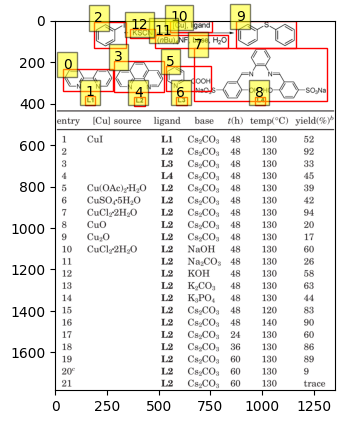

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[2, 6], [3, 1], [0, 7]]
tensor([False])
tensor([False])
tensor([False])
[tensor([ 868.3000,    4.2000, 1205.2000,  189.5000]), tensor([1006.,  148., 1052.,  196.]), tensor([141.4000,   9.9000, 400.0000, 166.0000]), tensor([208.2000, 156.1000, 252.0000, 206.0000]), tensor([413.3000,  30.6000, 680.2000, 152.4000]), tensor([525.6000, 159.0000, 578.0000, 206.0000])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([141.4000,   9.9000, 400.0000, 166.0000]), tensor([208.2000, 156.1000, 252.0000, 206.0000]), tensor([413.3000,  30.6000, 680.2000, 152.4000]), tensor([525.6000, 159.0000, 578.0000, 206.0000]), tensor([ 868.3000,    4.2000, 1205.2000,  189.5000]), tensor([1006.,  148., 1052.,  196.]), tensor([689.0000,   9.0000, 867.6000,  97.6000]), tensor([690.0000, 108.2000, 845.8000

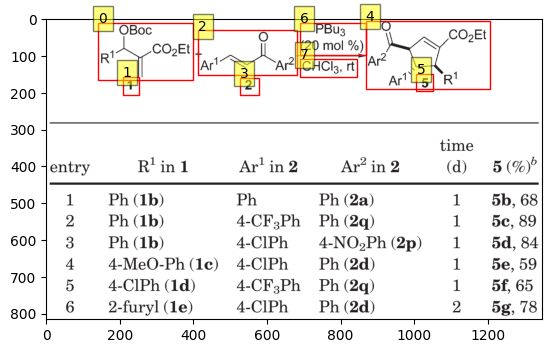

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[4, 2], [3, 5], [7, 8]]
tensor([False])
tensor([False])
tensor([False])
[tensor([396.3000,  21.9000, 651.4000, 146.5000]), tensor([485.6300, 170.0000, 557.6300, 221.0000]), tensor([142.3000,  19.5000, 350.0000, 176.7000]), tensor([178.6400, 180.7300, 243.6400, 225.7300]), tensor([ 871.,    0., 1210.,  232.]), tensor([911., 178., 979., 223.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([142.3000,  19.5000, 350.0000, 176.7000]), tensor([178.6400, 180.7300, 243.6400, 225.7300]), tensor([396.3000,  21.9000, 651.4000, 146.5000]), tensor([485.6300, 170.0000, 557.6300, 221.0000]), tensor([ 871.,    0., 1210.,  232.]), tensor([911., 178., 979., 223.]), tensor([665.8300,  63.8400, 844.0800, 107.9900]), tensor([667.4600, 119.4400, 835.9100, 163.6000])]
[tensor(1), tensor(3), ten

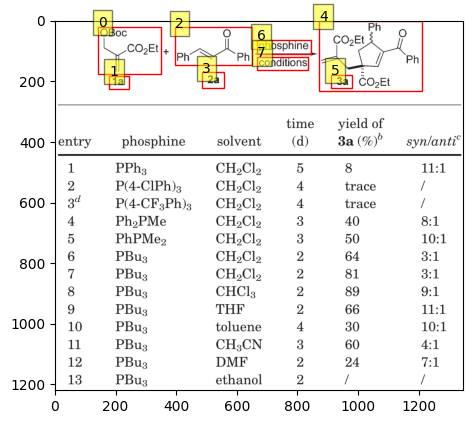

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[8, 5], [4, 6], [0, 7], [1, 2]]
tensor([False])
tensor([False])
tensor([False])
tensor([False])
[tensor([ 911.4000,    0.0000, 1170.0000,  139.0000]), tensor([ 975.,  151., 1027.,  192.]), tensor([450.9000, 223.0000, 690.0000, 418.0000]), tensor([745.0000, 289.0000, 926.0000, 365.8000]), tensor([398.,  82., 546., 131.]), tensor([464., 155., 509., 200.]), tensor([175.,  36., 308., 143.]), tensor([218., 155., 265., 194.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([175.,  36., 308., 143.]), tensor([218., 155., 265., 194.]), tensor([398.,  82., 546., 131.]), tensor([464., 155., 509., 200.]), tensor([450.9000, 223.0000, 690.0000, 418.0000]), tensor([745.0000, 289.0000, 926.0000, 365.8000]), tensor([ 911.4000,    0.0000, 1170.0000,  139.0000]), tensor

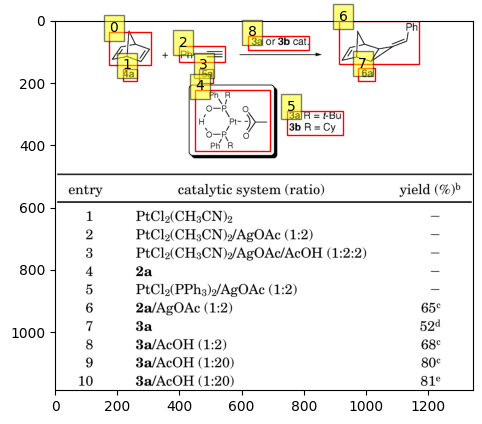

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[15, 4], [1, 5], [12, 3], [13, 8], [14, 2], [11, 7], [10, 6], [9, 0]]
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
[tensor([ 794.,    9., 1137.,  154.]), tensor([906.0000, 156.0000, 944.4000, 195.2000]), tensor([ 831.1000,  712.8900, 1161.3000, 1069.4000]), tensor([ 860., 1096.,  901., 1149.]), tensor([ 477.8000,  711.6900,  826.4000, 1153.4000]), tensor([ 424.3000, 1095.9000,  470.3000, 1149.9000]), tensor([ 192.8000,  720.8000,  504.5000, 1023.2000]), tensor([ 220.0000, 1099.0000,  267.1000, 1148.3000]), tensor([217.9500, 383.0500, 370.3000, 638.1000]), tensor([192.9900, 602.8600, 227.0800, 646.2500]), tensor([398.2000, 238.5000, 738.1000, 577.4000]), tensor([501.0000, 597.5000, 551.2000, 642.0000]), tensor([ 831.000

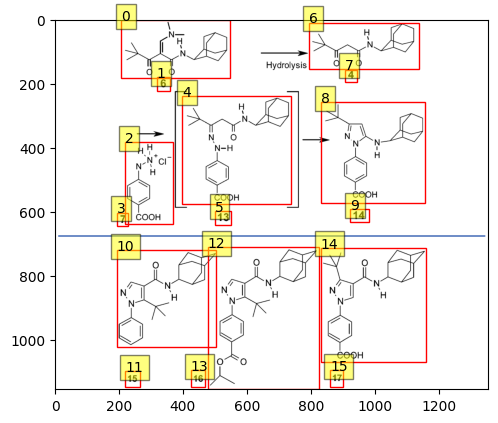

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[0, 2], [1, 4]]
tensor([False])
tensor([False])
[tensor([ 38.1000,   0.0000, 563.0000, 424.0000]), tensor([268., 398., 316., 448.]), tensor([ 794.0000,   46.0000, 1307.0000,  424.5000]), tensor([1025.,  398., 1059.,  441.])]
[tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([ 38.1000,   0.0000, 563.0000, 424.0000]), tensor([268., 398., 316., 448.]), tensor([ 794.0000,   46.0000, 1307.0000,  424.5000]), tensor([1025.,  398., 1059.,  441.]), tensor([588., 177., 771., 277.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(2)]
tensor(38.1000) tensor(0.)
tensor(268.) tensor(398.)
tensor(794.) tensor(46.)
tensor(1025.) tensor(398.)
tensor(588.) tensor(177.)


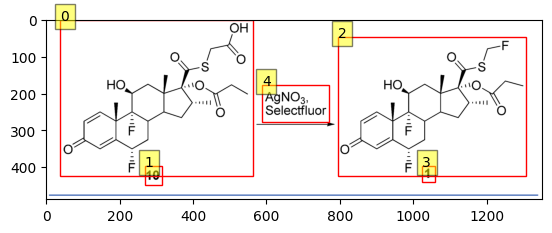

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[5, 3], [4, 0]]
tensor([False])
tensor([False])
[tensor([ 298.,  822., 1205., 1232.]), tensor([ 931., 1135.,  969., 1180.]), tensor([  0., 379., 897., 802.]), tensor([616., 690., 668., 740.])]
[tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([  0., 379., 897., 802.]), tensor([616., 690., 668., 740.]), tensor([ 298.,  822., 1205., 1232.]), tensor([ 931., 1135.,  969., 1180.]), tensor([  62., 1011.,  318., 1065.]), tensor([ 19.0000, 892.1000, 350.0000, 982.0000])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(2), tensor(2)]
tensor(0.) tensor(379.)
tensor(616.) tensor(690.)
tensor(298.) tensor(822.)
tensor(931.) tensor(1135.)
tensor(62.) tensor(1011.)
tensor(19.) tensor(892.1000)


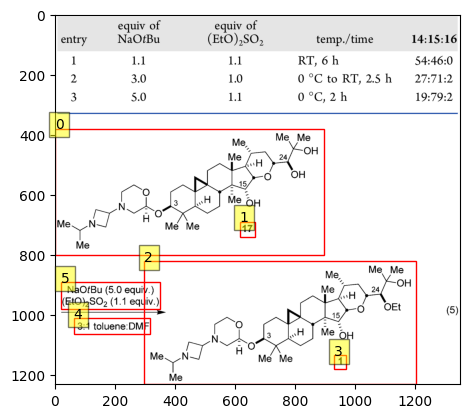

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[17, 12], [18, 13], [16, 11], [14, 10], [15, 9]]
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
[tensor([ 52.9000,  43.0000, 225.0000, 245.0000]), tensor([ 110.,  792.,  439., 1009.]), tensor([ 241., 1027.,  307., 1080.]), tensor([ 934.,  723., 1250., 1052.]), tensor([1055., 1079., 1126., 1132.]), tensor([449., 564., 929., 842.]), tensor([642., 817., 708., 862.]), tensor([ 43., 357., 540., 545.]), tensor([239., 544., 313., 595.]), tensor([ 888.,  347., 1352.,  600.]), tensor([1055.,  558., 1126.,  605.]), tensor([ 919.,   78., 1352.,  268.]), tensor([305.,  57., 479., 256.])]
[tensor(1), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(1)]
[tensor([ 43., 357., 540., 545.]), tensor([239., 54

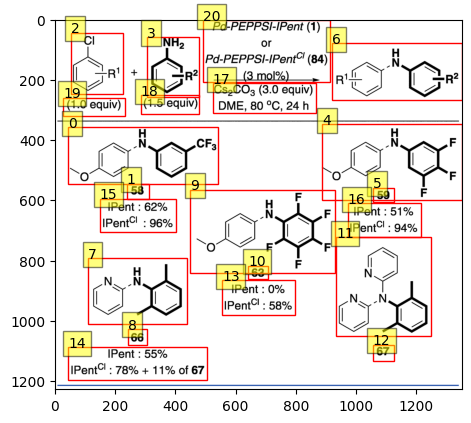

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[17, 5], [18, 3], [19, 4], [20, 6], [21, 7]]
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
[tensor([ 46.,  26., 231., 242.]), tensor([309.,  22., 490., 240.]), tensor([ 899.,   63., 1353.,  259.]), tensor([ 15., 358., 490., 602.]), tensor([187., 587., 252., 637.]), tensor([458., 354., 916., 616.]), tensor([652., 592., 713., 637.]), tensor([ 927.,  342., 1356.,  592.]), tensor([1100.,  589., 1158.,  638.]), tensor([183., 729., 737., 982.]), tensor([369., 947., 425., 994.]), tensor([ 765.,  734., 1233.,  989.]), tensor([ 958.,  946., 1019.,  993.])]
[tensor(1), tensor(1), tensor(1), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([ 15., 358., 490., 602.]), tensor([187., 587., 252., 637.]), tensor([ 4

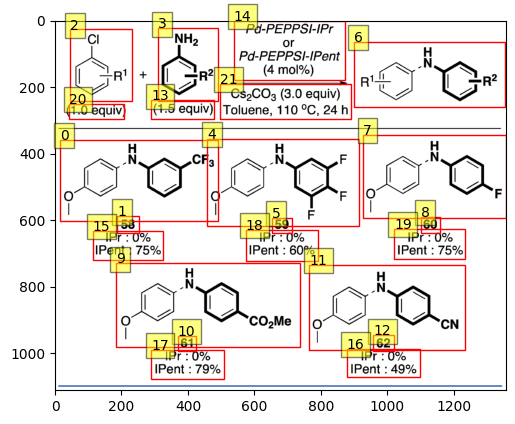

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[3, 27], [5, 26], [2, 25], [10, 24], [9, 23], [7, 20], [8, 21], [28, 22]]
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
[tensor([739., 239., 938., 292.]), tensor([287.3000, 227.0000, 461.8000, 293.0000]), tensor([ 10.1000, 630.3000, 445.0000, 848.0000]), tensor([123., 859., 180., 902.]), tensor([ 896.4000,    0.0000, 1118.0000,  323.8000]), tensor([ 977.,  330., 1026.,  367.]), tensor([ 47.0000, 235.0300, 168.0000, 284.0300]), tensor([1131.1000,    0.0000, 1331.7000,  281.8000]), tensor([1211.,  328., 1258.,  371.]), tensor([   6.1000, 1106.4000,  464.7000, 1330.5000]), tensor([ 208., 1326.,  269., 1369.]), tensor([ 492.0000, 1099.0000,  883.9000, 1330.6000]), tensor([ 686., 1330.,  746., 1369.]), tensor([ 887.0000,  62

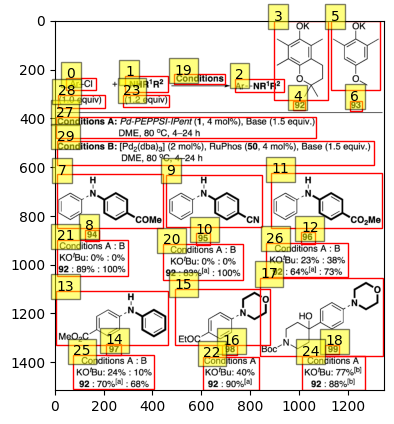

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[5, 4], [6, 1], [22, 9]]
tensor([False])
tensor([False])
tensor([False])
[tensor([  0.0000, 251.4000, 508.1000, 559.8000]), tensor([208.3000, 554.8500, 261.3000, 617.8500]), tensor([ 660.0000,  238.2000, 1144.1000,  530.0000]), tensor([807.1500, 555.1500, 875.1500, 613.1500]), tensor([ 644.,  768., 1138., 1064.]), tensor([  31.,  766.,  540., 1082.]), tensor([ 227., 1085.,  281., 1150.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(1), tensor(3)]
[tensor([  0.0000, 251.4000, 508.1000, 559.8000]), tensor([208.3000, 554.8500, 261.3000, 617.8500]), tensor([ 660.0000,  238.2000, 1144.1000,  530.0000]), tensor([807.1500, 555.1500, 875.1500, 613.1500]), tensor([  31.,  766.,  540., 1082.]), tensor([ 227., 1085.,  281., 1150.]), tensor([ 644.,  768., 1138., 1064.]), tensor([851., 656., 96

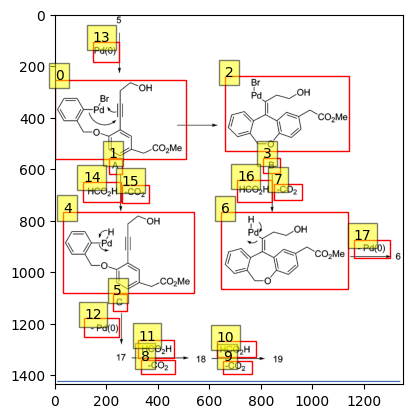

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[0, 6], [1, 7], [11, 8]]
tensor([False])
tensor([False])
tensor([False])
[tensor([ 29.3000,  66.6000, 243.0000, 408.4000]), tensor([105., 449., 175., 509.]), tensor([258.0000,  87.6000, 461.8000, 402.7000]), tensor([377., 454., 422., 507.]), tensor([ 823.,    0., 1122.,  514.]), tensor([903., 546., 978., 601.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([ 29.3000,  66.6000, 243.0000, 408.4000]), tensor([105., 449., 175., 509.]), tensor([258.0000,  87.6000, 461.8000, 402.7000]), tensor([377., 454., 422., 507.]), tensor([ 823.,    0., 1122.,  514.]), tensor([903., 546., 978., 601.]), tensor([492.0000, 104.0000, 810.4000, 221.1000]), tensor([1108.8000,  275.0000, 1316.0000,  344.0000]), tensor([519., 257., 756., 399.]), tensor([504., 431., 786., 481.])]
[tensor(1), tenso

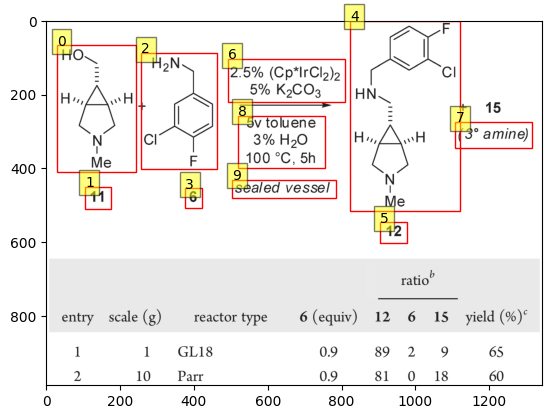

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[7, 3], [5, 2], [4, 1]]
tensor([False])
tensor([False])
tensor([False])
[tensor([1831.,    0., 2269.,  227.]), tensor([2124.,  219., 2172.,  253.]), tensor([1316.,    0., 1762.,  230.]), tensor([1632.,  215., 1680.,  251.]), tensor([524.,   0., 979., 229.]), tensor([823., 218., 873., 253.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([524.,   0., 979., 229.]), tensor([823., 218., 873., 253.]), tensor([1316.,    0., 1762.,  230.]), tensor([1632.,  215., 1680.,  251.]), tensor([1831.,    0., 2269.,  227.]), tensor([2124.,  219., 2172.,  253.]), tensor([1041.,   40., 1259.,  133.]), tensor([1050.,  174., 1244.,  220.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(2), tensor(2)]
tensor(524.) tensor(0.)
tensor(823.) tensor(218.)
tensor(1316.) t

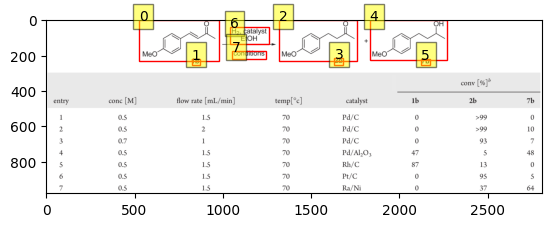

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[3, 2], [4, 6], [5, 0]]
tensor([False])
tensor([False])
tensor([False])
[tensor([437.3000,   4.5000, 781.0000, 226.1000]), tensor([667.3500, 199.3500, 723.3500, 266.3500]), tensor([1156.5000,   25.7000, 1590.2000,  246.4000]), tensor([1434.5300,  204.0000, 1490.5300,  263.0000]), tensor([1627.9000,   24.1000, 2371.3999,  243.0000]), tensor([1958.1500,  201.3500, 2035.6500,  266.2500])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([437.3000,   4.5000, 781.0000, 226.1000]), tensor([667.3500, 199.3500, 723.3500, 266.3500]), tensor([1156.5000,   25.7000, 1590.2000,  246.4000]), tensor([1434.5300,  204.0000, 1490.5300,  263.0000]), tensor([1627.9000,   24.1000, 2371.3999,  243.0000]), tensor([1958.1500,  201.3500, 2035.6500,  266.2500]), tensor([ 897.9500,  152.7500, 1090.660

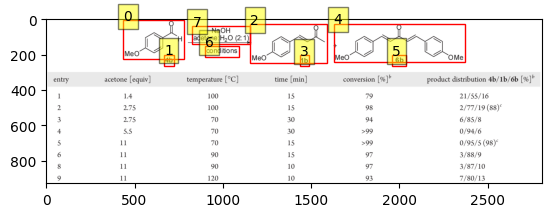

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[4, 10], [3, 9], [2, 8], [6, 0]]
tensor([False])
tensor([False])
tensor([False])
tensor([False])
[tensor([1449.0000,  166.9000, 1997.6000,  647.9000]), tensor([1707.,  550., 1765.,  606.]), tensor([ 941.2000,  286.5000, 1390.1000,  512.0000]), tensor([1126.,  550., 1180.,  606.]), tensor([271.9000, 304.9000, 666.1000, 528.7000]), tensor([394., 560., 455., 596.]), tensor([675.4000, 238.1000, 928.5000, 418.5000]), tensor([2027.,    0., 2535.,  652.]), tensor([2248.,  541., 2319.,  602.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(1), tensor(3)]
[tensor([271.9000, 304.9000, 666.1000, 528.7000]), tensor([394., 560., 455., 596.]), tensor([675.4000, 238.1000, 928.5000, 418.5000]), tensor([ 941.2000,  286.5000, 1390.1000,  512.0000]), tensor([1126.,  550., 1180.,  

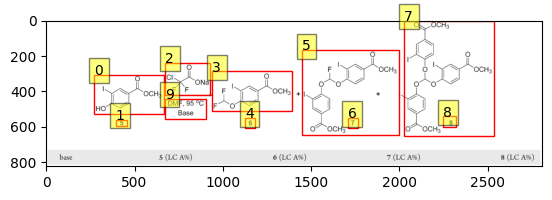

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[1, 4], [8, 3], [7, 2], [6, 5]]
tensor([False])
tensor([False])
tensor([False])
tensor([False])
[tensor([ 49.3000,  82.2000, 272.9000, 258.0000]), tensor([ 84.9500, 248.0800, 127.9500, 303.0800]), tensor([1069.1000,   77.0000, 1302.4000,  314.7000]), tensor([1114.0000,  253.0000, 1152.1000,  299.0000]), tensor([702.3000,  80.1000, 959.6000, 285.7000]), tensor([742.9000, 254.9500, 783.8000, 299.0000]), tensor([375.1000,   5.0000, 617.0000, 139.0000]), tensor([315.1000, 100.0000, 354.0000, 150.0000])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([ 49.3000,  82.2000, 272.9000, 258.0000]), tensor([ 84.9500, 248.0800, 127.9500, 303.0800]), tensor([375.1000,   5.0000, 617.0000, 139.0000]), tensor([315.1000, 100.0000, 354.0000, 150.0000]), tensor([702.3000

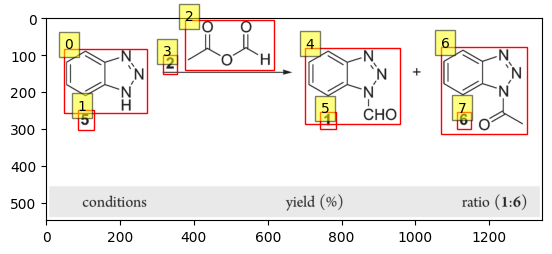

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[5, 1], [2, 3], [4, 0]]
tensor([False])
tensor([False])
tensor([False])
[tensor([1.3372e+03, 7.5000e-01, 1.8736e+03, 2.1710e+02]), tensor([1556.8800,  244.7500, 1610.8800,  294.7500]), tensor([1908.6000,    3.0000, 2366.0000,  217.3000]), tensor([2038.6300,  248.7500, 2106.6299,  301.7500]), tensor([454.1000,   6.0000, 980.0000, 222.0000]), tensor([664.8800, 244.0000, 721.8800, 301.0000])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([454.1000,   6.0000, 980.0000, 222.0000]), tensor([664.8800, 244.0000, 721.8800, 301.0000]), tensor([1.3372e+03, 7.5000e-01, 1.8736e+03, 2.1710e+02]), tensor([1556.8800,  244.7500, 1610.8800,  294.7500]), tensor([1908.6000,    3.0000, 2366.0000,  217.3000]), tensor([2038.6300,  248.7500, 2106.6299,  301.7500]), tensor([1009.,  144., 1296.,  

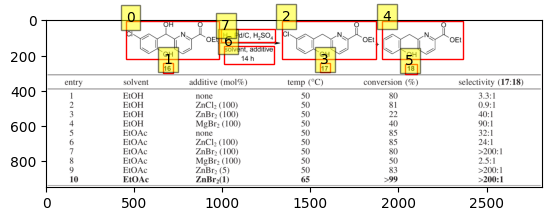

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[5, 8], [0, 2], [4, 3]]
tensor([False])
tensor([False])
tensor([False])
[tensor([357.,  55., 621., 220.]), tensor([554., 226., 634., 269.]), tensor([ 911.,    2., 1255.,  266.]), tensor([1025.,  209., 1110.,  257.]), tensor([ 92.,  22., 458., 234.]), tensor([284., 231., 345., 272.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([ 92.,  22., 458., 234.]), tensor([284., 231., 345., 272.]), tensor([357.,  55., 621., 220.]), tensor([554., 226., 634., 269.]), tensor([ 911.,    2., 1255.,  266.]), tensor([1025.,  209., 1110.,  257.]), tensor([620.,  90., 881., 141.]), tensor([651., 161., 876., 260.]), tensor([115.3500, 104.5800, 229.3500, 163.9200])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(2), tensor(2), tensor(2)]
tensor(92.) tensor(22.)
tens

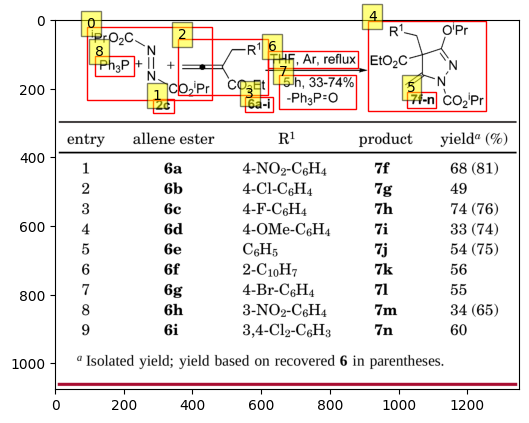

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[]
[tensor([ 795.,  450., 1012.,  654.]), tensor([ 923.,   45., 1214.,  258.]), tensor([ 715.,  648., 1095.,  840.]), tensor([234., 859., 580., 981.]), tensor([113.1800,  45.9700, 406.1800, 183.9700]), tensor([ 677.,  838., 1132., 1040.])]
[tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
[tensor([113.1800,  45.9700, 406.1800, 183.9700]), tensor([ 795.,  450., 1012.,  654.]), tensor([ 923.,   45., 1214.,  258.]), tensor([234., 859., 580., 981.]), tensor([ 677.,  838., 1132., 1040.]), tensor([ 715.,  648., 1095.,  840.]), tensor([449.,   0., 808., 108.]), tensor([463., 142., 822., 245.])]
[tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(2), tensor(2)]
tensor(113.1800) tensor(45.9700)
tensor(795.) tensor(450.)
tensor(923.) tensor(45.)
tensor(234.) tensor(859.)
t

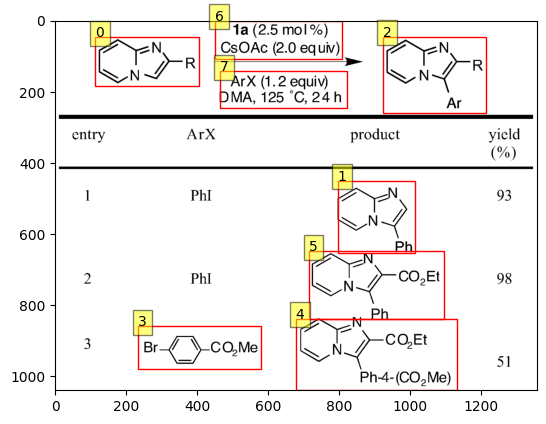

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[7, 4], [6, 9], [1, 8], [12, 11]]
tensor([False])
tensor([False])
tensor([False])
tensor([False])
[tensor([623., 382., 984., 572.]), tensor([727.8600, 567.0000, 821.8600, 605.0000]), tensor([221.2000, 384.9000, 527.5000, 568.3000]), tensor([457.0000, 565.0000, 551.1000, 610.0000]), tensor([ 29.7000, 184.7000, 415.7000, 316.0000]), tensor([277., 323., 371., 367.]), tensor([1008.,  386., 1335.,  571.]), tensor([1089.0000,  567.0000, 1306.0000,  608.9000])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([ 29.7000, 184.7000, 415.7000, 316.0000]), tensor([277., 323., 371., 367.]), tensor([221.2000, 384.9000, 527.5000, 568.3000]), tensor([457.0000, 565.0000, 551.1000, 610.0000]), tensor([623., 382., 984., 572.]), tensor([727.8600, 567.0000, 821.8600, 605.00

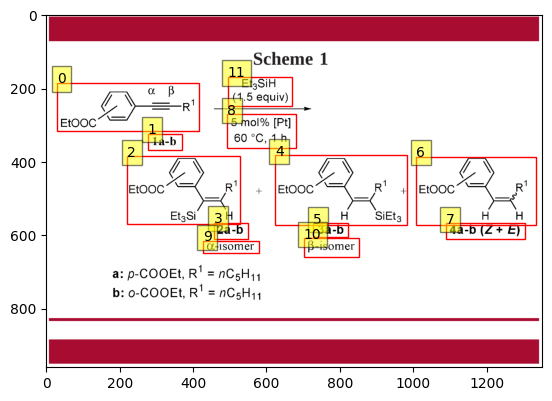

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[5, 15], [3, 13], [4, 12], [0, 16], [7, 14]]
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
[tensor([2221.8999,  433.6000, 2485.8999,  710.0000]), tensor([2191.,  755., 2495.,  872.]), tensor([ 926.2900,  483.2400, 1176.1000,  715.0000]), tensor([ 709.,  727., 1438.,  951.]), tensor([1538.5000,  457.1000, 1752.3000,  685.3000]), tensor([1576.,  780., 1646.,  836.]), tensor([328.2000, 495.7000, 602.6000, 729.0000]), tensor([344., 745., 616., 811.]), tensor([ 653.2000, 1030.0000,  862.1000, 1301.0000]), tensor([ 648., 1306.,  948., 1407.]), tensor([1857.,  561., 2105.,  717.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1)]
[tensor([328.2000, 495.7000, 602.6000, 729.0000]), tensor([344., 745., 61

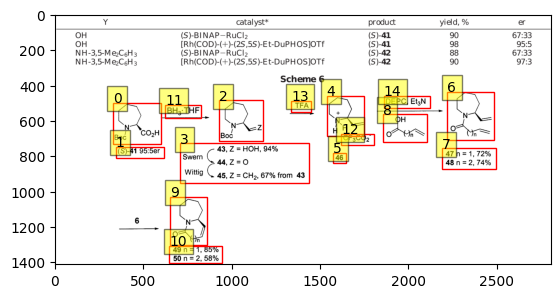

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[2, 12]]
tensor([False])
[tensor([ 859.3800,   13.3000, 1148.5701,  143.3000]), tensor([ 306.5000,  348.0000, 1365.4000,  489.5000]), tensor([1398.,  391., 1470.,  452.]), tensor([477.5000,   0.7000, 644.2000, 138.9000]), tensor([   8.0000, 1076.0000,  411.0000, 1377.1000]), tensor([ 561.0000, 1082.0000,  962.0000, 1368.1000]), tensor([  57.0000, 1571.5000,  397.0000, 1828.0000]), tensor([1081., 1076., 1499., 1370.]), tensor([ 509., 1503.,  964., 1828.]), tensor([1211.0000, 1580.9000, 1549.0000, 1828.0000]), tensor([1038.0000,  578.0000, 1495.0000, 1004.4000]), tensor([ 543.0000,  592.0000,  975.8000, 1004.0000]), tensor([ 10.0000, 603.7000, 449.3000, 994.1000])]
[tensor(1), tensor(1), tensor(3), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor

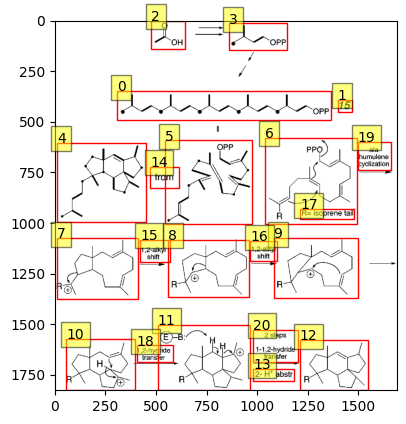

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[18, 14], [10, 19], [0, 8], [16, 5], [7, 4], [6, 1], [17, 2]]
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
[tensor([ 851.,   27., 1025.,  182.]), tensor([ 968.,  205., 1010.,  243.]), tensor([354., 741., 639., 865.]), tensor([437., 839., 499., 891.]), tensor([720., 520., 926., 679.]), tensor([921., 655., 983., 705.]), tensor([598., 134., 826., 260.]), tensor([716.2700, 167.6100, 747.1000, 207.8300]), tensor([352.0000, 529.0000, 547.0000, 636.7000]), tensor([442., 660., 508., 706.]), tensor([ 727.6000,  713.0000, 1020.0000,  866.1000]), tensor([914., 839., 978., 886.]), tensor([343.0000,  62.4000, 483.0000, 175.0000]), tensor([330.0000, 201.0000, 527.2000, 243.0000])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), t

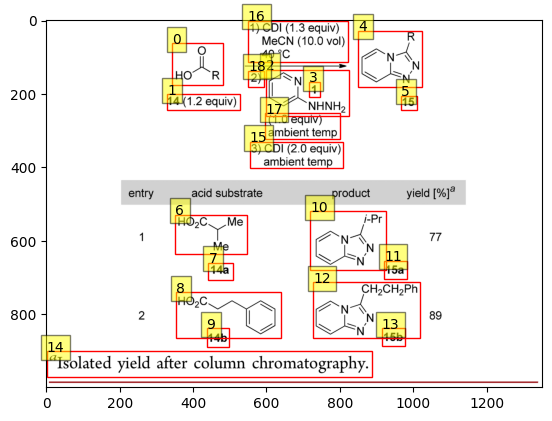

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[4, 5], [13, 6], [7, 11], [9, 3], [8, 12]]
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
[tensor([  5.,   0., 349., 233.]), tensor([214., 188., 263., 227.]), tensor([ 998.,    3., 1336.,  234.]), tensor([1197.0000,  186.6000, 1250.0000,  236.0000]), tensor([ 810.0000,  711.0000, 1161.0000,  993.3000]), tensor([ 784.0000, 1027.7000, 1211.0000, 1067.0000]), tensor([253.0000, 735.0000, 594.0000, 985.6000]), tensor([ 250., 1029.,  652., 1073.]), tensor([486.0000,   1.0000, 839.0000, 223.9000]), tensor([711., 180., 766., 229.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([  5.,   0., 349., 233.]), tensor([214., 188., 263., 227.]), tensor([486.0000,   1.0000, 839.0000, 223.9000]), tensor([711., 180

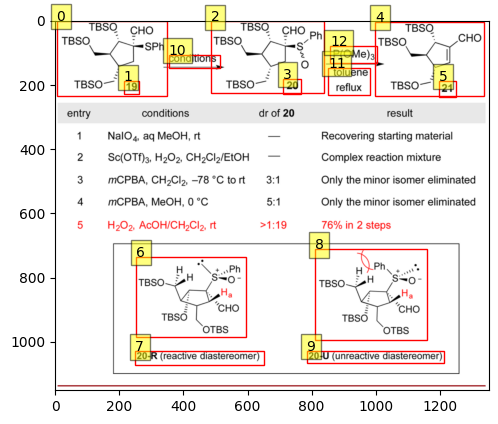

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[7, 2], [6, 1], [8, 11], [5, 10], [5, 13], [5, 12]]
tensor([False, False, False])
tensor([False])
tensor([False])
tensor([False])
[tensor([ 44., 296., 388., 557.]), tensor([ 44., 564., 424., 670.]), tensor([522., 342., 846., 457.]), tensor([ 517.,  508., 1150.,  673.]), tensor([362.,  16., 642., 211.]), tensor([443., 240., 530., 280.]), tensor([ 50.,  30., 292., 213.]), tensor([142., 237., 192., 281.]), tensor([ 834.0000,    3.2000, 1302.0000,  242.0000]), tensor([ 849.,  242., 1297.,  280.]), tensor([ 894.0000,  280.0000, 1150.1000,  406.1000]), tensor([ 891.5100,  383.4400, 1206.0900,  514.8800])]
[tensor(1), tensor(3), tensor(3), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(1)]
[tensor([ 44., 296., 388., 557.]), tensor([ 44., 564., 424., 670.]), te

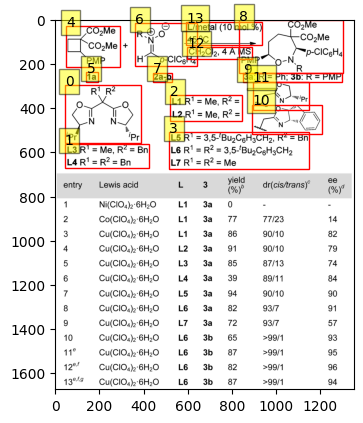

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[1, 5], [2, 4], [7, 8]]
tensor([False])
tensor([False])
tensor([False])
[tensor([ 48.7000,  39.2000, 374.0000, 259.0000]), tensor([152., 259., 252., 304.]), tensor([392.0000,  73.6000, 585.0000, 183.0000]), tensor([463., 266., 516., 309.]), tensor([ 932.,    6., 1310.,  257.]), tensor([1065.,  260., 1179.,  310.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([ 48.7000,  39.2000, 374.0000, 259.0000]), tensor([152., 259., 252., 304.]), tensor([392.0000,  73.6000, 585.0000, 183.0000]), tensor([463., 266., 516., 309.]), tensor([ 932.,    6., 1310.,  257.]), tensor([1065.,  260., 1179.,  310.]), tensor([601.0000,  91.0000, 925.0000, 139.8000]), tensor([603.1900, 161.7800, 858.1800, 210.6400])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(2), tens

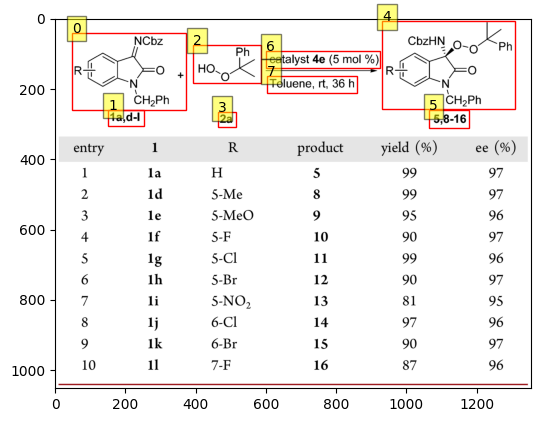

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[5, 0], [6, 1]]
tensor([False])
tensor([False])
[tensor([362.2000,  78.3000, 609.0000, 212.0000]), tensor([  0.0000,  61.3000, 267.0000, 219.0000]), tensor([135.9400, 209.9400, 173.9400, 248.9400]), tensor([1014.4000,    7.1000, 1350.0000,  226.0000]), tensor([1215.0000,  210.2000, 1260.0000,  261.0000])]
[tensor(1), tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([  0.0000,  61.3000, 267.0000, 219.0000]), tensor([135.9400, 209.9400, 173.9400, 248.9400]), tensor([362.2000,  78.3000, 609.0000, 212.0000]), tensor([1014.4000,    7.1000, 1350.0000,  226.0000]), tensor([1215.0000,  210.2000, 1260.0000,  261.0000]), tensor([687.0000,  82.2000, 897.0000, 137.0000]), tensor([658.0000, 146.0000, 928.7000, 198.9000])]
[tensor(1), tensor(3), tensor(1), tensor(1), tensor(3), tensor(2), tensor(2)]
tensor(0.) 

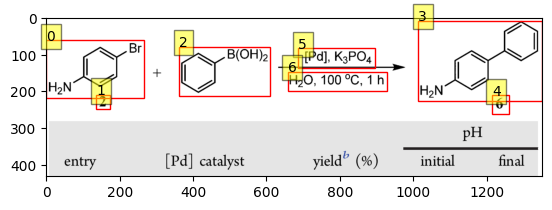

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[]
[tensor([1017.0000,  230.0000, 1325.0000,  478.6000]), tensor([490.8000, 212.7000, 826.8000, 480.1000]), tensor([ 26.3000, 291.9000, 289.3000, 449.6000])]
[tensor(1), tensor(1), tensor(1)]
[tensor([ 26.3000, 291.9000, 289.3000, 449.6000]), tensor([490.8000, 212.7000, 826.8000, 480.1000]), tensor([1017.0000,  230.0000, 1325.0000,  478.6000]), tensor([866.8500, 300.0000, 979.8500, 360.8000]), tensor([845.8600, 169.1500, 950.8600, 255.1500]), tensor([874.2800, 387.0000, 970.3800, 437.0000]), tensor([247., 521., 843., 626.]), tensor([300., 288., 433., 357.]), tensor([315., 396., 416., 483.])]
[tensor(1), tensor(1), tensor(1), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2)]
tensor(26.3000) tensor(291.9000)
tensor(490.8000) tensor(212.7000)
tensor(1017.) tensor(230.)
tensor(866.8500) te

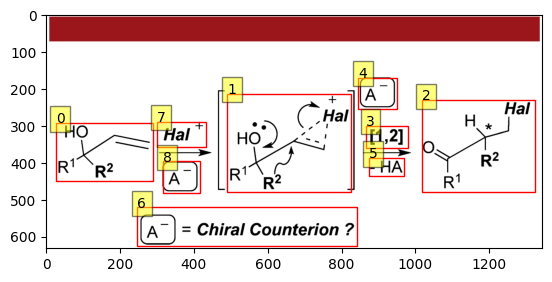

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[7, 3], [6, 2]]
tensor([False])
tensor([False])
[tensor([ 995.1000,    0.0000, 1286.0000,  242.4000]), tensor([1132.,  242., 1187.,  291.]), tensor([ 68.1000,  21.0000, 384.9000, 245.9000]), tensor([189., 236., 243., 294.])]
[tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([ 68.1000,  21.0000, 384.9000, 245.9000]), tensor([189., 236., 243., 294.]), tensor([ 995.1000,    0.0000, 1286.0000,  242.4000]), tensor([1132.,  242., 1187.,  291.]), tensor([636.0000, 127.0000, 933.9000, 179.9000]), tensor([468.,  98., 624., 155.]), tensor([725.,  60., 835., 115.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(2), tensor(2), tensor(2)]
tensor(68.1000) tensor(21.)
tensor(189.) tensor(236.)
tensor(995.1000) tensor(0.)
tensor(1132.) tensor(242.)
tensor(636.) tensor(127.)
tensor(468.) tensor(98.)
tensor(7

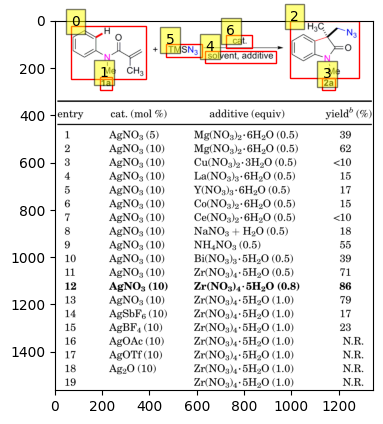

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[]
[tensor([   0.,  349.,  845., 1335.]), tensor([ 968.9000,  319.6000, 1194.3000,  683.6000]), tensor([ 859.4000,  674.8000, 1356.0000, 1336.0000]), tensor([1016.8000,  139.1000, 1283.5000,  316.6000]), tensor([572.7000, 141.9000, 869.8000, 334.4000]), tensor([246.8000, 151.0000, 471.6000, 294.5000]), tensor([ 36.3000, 166.0000, 230.0000, 330.6000]), tensor([883.0000, 204.3300, 980.3000, 251.6300])]
[tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
[tensor([   0.,  349.,  845., 1335.]), tensor([ 36.3000, 166.0000, 230.0000, 330.6000]), tensor([246.8000, 151.0000, 471.6000, 294.5000]), tensor([572.7000, 141.9000, 869.8000, 334.4000]), tensor([883.0000, 204.3300, 980.3000, 251.6300]), tensor([ 968.9000,  319.6000, 1194.3000,  683.6000]), tensor([1016.8000,  139.10

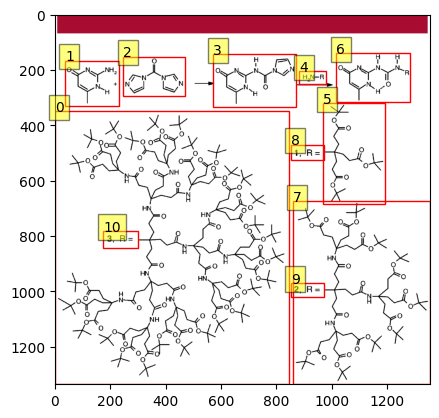

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[]
[tensor([ 797.2000,  729.1000, 1123.5000,  979.8000]), tensor([ 91.1000, 751.2000, 382.4000, 981.4000]), tensor([113.6000, 199.1000, 428.4000, 449.2000])]
[tensor(1), tensor(1), tensor(1)]
[tensor([113.6000, 199.1000, 428.4000, 449.2000]), tensor([ 91.1000, 751.2000, 382.4000, 981.4000]), tensor([ 797.2000,  729.1000, 1123.5000,  979.8000]), tensor([135.9000, 522.0000, 258.4000, 651.0000]), tensor([502.0000, 826.3000, 678.0000, 887.7000])]
[tensor(1), tensor(1), tensor(1), tensor(2), tensor(2)]
tensor(113.6000) tensor(199.1000)
tensor(91.1000) tensor(751.2000)
tensor(797.2000) tensor(729.1000)
tensor(135.9000) tensor(522.)
tensor(502.) tensor(826.3000)


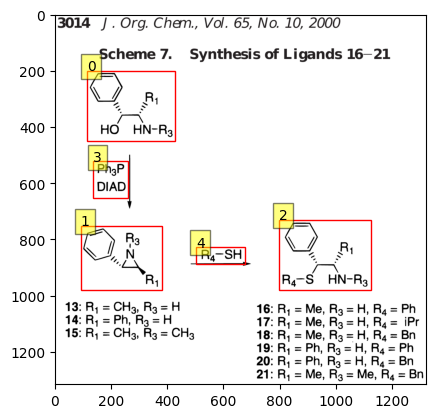

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[4, 0], [3, 2]]
tensor([False])
tensor([False])
[tensor([840., 165., 964., 205.]), tensor([ 780.0000,    7.0000, 1110.9000,  178.5000]), tensor([840., 165., 964., 205.]), tensor([243.2000,  27.0000, 538.0000, 163.0000]), tensor([340., 166., 371., 208.])]
[tensor(1), tensor(1), tensor(1), tensor(1), tensor(3)]
[tensor([243.2000,  27.0000, 538.0000, 163.0000]), tensor([340., 166., 371., 208.]), tensor([ 780.0000,    7.0000, 1110.9000,  178.5000]), tensor([840., 165., 964., 205.]), tensor([840., 165., 964., 205.]), tensor([550., 110., 731., 196.]), tensor([545.,   1., 733.,  83.])]
[tensor(1), tensor(3), tensor(1), tensor(1), tensor(1), tensor(2), tensor(2)]
tensor(243.2000) tensor(27.)
tensor(340.) tensor(166.)
tensor(780.) tensor(7.)
tensor(840.) tensor(165.)
tensor(840.) tensor(165.)
tensor(550.) ten

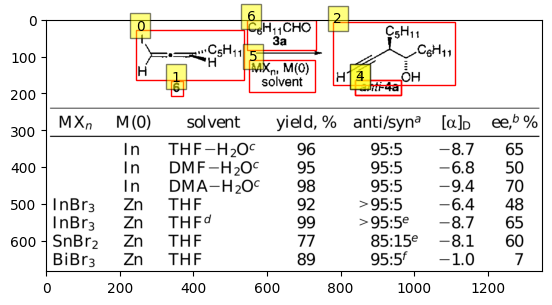

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[9, 13], [7, 14], [10, 12], [0, 5], [8, 6]]
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
[tensor([572.0000, 178.0000, 899.0000, 355.9000]), tensor([657.0100, 370.9200, 791.0100, 418.9200]), tensor([ 775.1000,    6.0000, 1148.8000,  136.0000]), tensor([938., 108., 980., 155.]), tensor([ 836.1000,  129.0000, 1221.0000,  362.1000]), tensor([1035.2000,  373.0000, 1094.8999,  410.0000]), tensor([138.4000,   0.0000, 381.0000, 142.9000]), tensor([196., 101., 234., 140.]), tensor([300.4000, 181.0000, 624.9000, 355.0000]), tensor([357., 369., 507., 420.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([138.4000,   0.0000, 381.0000, 142.9000]), tensor([196., 101., 234., 140.]), tensor([300.4000, 181.0000

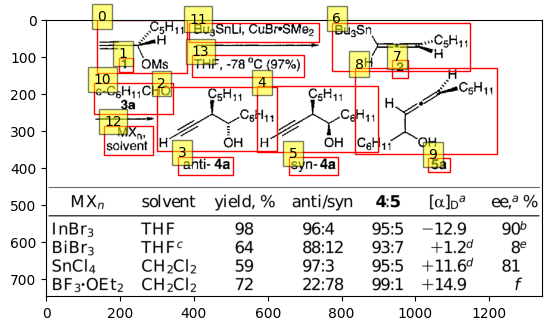

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[11, 13], [12, 0], [14, 1], [7, 4], [15, 3]]
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
[tensor([ 234.9000, 1404.3000,  526.3000, 1589.7001]), tensor([ 261., 1624.,  347., 1688.]), tensor([225.1000, 243.0000, 520.3000, 438.9000]), tensor([251.0000, 473.0000, 334.9000, 537.0000]), tensor([ 232.1000,  820.9000,  526.7000, 1014.6000]), tensor([ 235., 1048.,  363., 1112.]), tensor([ 951.4000,  793.9000, 1251.2000, 1032.2001]), tensor([ 982., 1051., 1065., 1106.]), tensor([ 953.5000, 1374.2000, 1243.6000, 1603.5000]), tensor([ 976., 1627., 1072., 1682.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([225.1000, 243.0000, 520.3000, 438.9000]), tensor([251.0000, 473.0000, 334.9000, 537.0000]), tenso

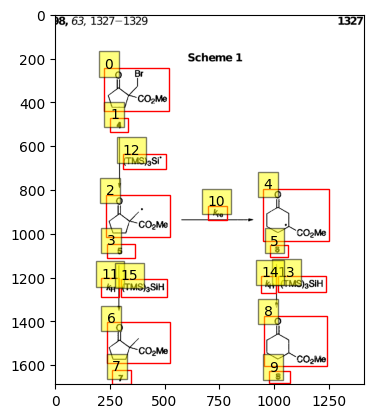

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[7, 4]]
tensor([False])
[tensor([352.,  30., 645., 289.]), tensor([ 26.0000,  36.0000, 311.0000, 149.2000]), tensor([1043.,   51., 1329.,  215.]), tensor([477., 309., 519., 354.]), tensor([692.,  38., 981., 276.])]
[tensor(1), tensor(1), tensor(1), tensor(3), tensor(1)]
[tensor([ 26.0000,  36.0000, 311.0000, 149.2000]), tensor([352.,  30., 645., 289.]), tensor([692.,  38., 981., 276.]), tensor([1043.,   51., 1329.,  215.]), tensor([477., 309., 519., 354.]), tensor([121.6500, 220.7500, 223.9200, 268.8100])]
[tensor(1), tensor(1), tensor(1), tensor(1), tensor(3), tensor(2)]
tensor(26.) tensor(36.)
tensor(352.) tensor(30.)
tensor(692.) tensor(38.)
tensor(1043.) tensor(51.)
tensor(477.) tensor(309.)
tensor(121.6500) tensor(220.7500)


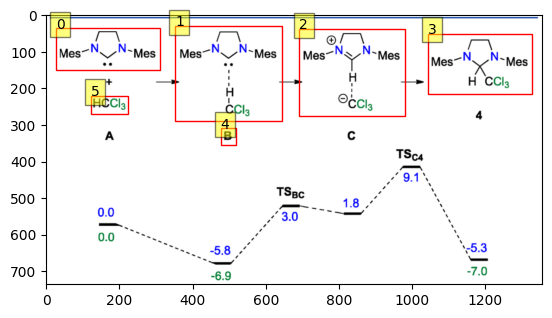

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[7, 5], [1, 6], [2, 0]]
tensor([False])
tensor([False])
tensor([False])
[tensor([338.,  55., 641., 181.]), tensor([463., 203., 514., 242.]), tensor([ 950.,    9., 1295.,  225.]), tensor([1057.,  200., 1131.,  252.]), tensor([ 55.,  49., 301., 227.]), tensor([172., 203., 224., 244.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([ 55.,  49., 301., 227.]), tensor([172., 203., 224., 244.]), tensor([338.,  55., 641., 181.]), tensor([463., 203., 514., 242.]), tensor([ 950.,    9., 1295.,  225.]), tensor([1057.,  200., 1131.,  252.]), tensor([654., 137., 952., 232.]), tensor([696.,  33., 910., 115.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(2), tensor(2)]
tensor(55.) tensor(49.)
tensor(172.) tensor(203.)
tensor(338.) tensor(55.)
tensor(463.) t

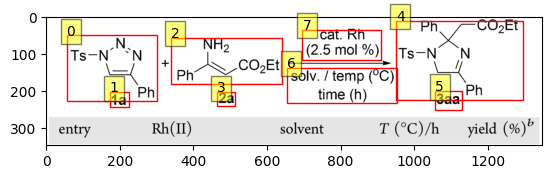

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[4, 5], [1, 2]]
tensor([False])
tensor([False])
[tensor([1000.,    5., 1305.,  235.]), tensor([1117.,  239., 1269.,  281.]), tensor([ 30.,   6., 367., 238.]), tensor([126., 242., 237., 283.])]
[tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([ 30.,   6., 367., 238.]), tensor([126., 242., 237., 283.]), tensor([1000.,    5., 1305.,  235.]), tensor([1117.,  239., 1269.,  281.]), tensor([618.,  92., 700., 139.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(2)]
tensor(30.) tensor(6.)
tensor(126.) tensor(242.)
tensor(1000.) tensor(5.)
tensor(1117.) tensor(239.)
tensor(618.) tensor(92.)


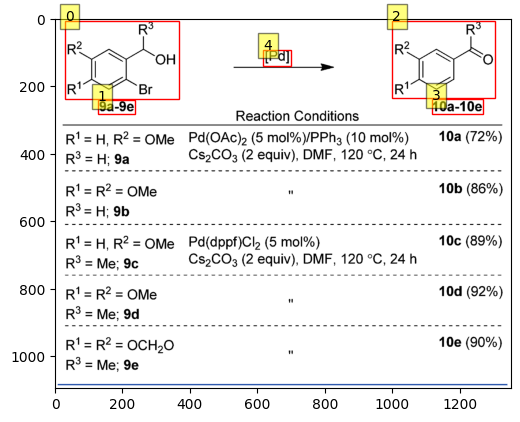

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[7, 5], [8, 0], [6, 1]]
tensor([False])
tensor([False])
tensor([False])
[tensor([ 789.0000,    0.0000, 1270.1000,  483.2000]), tensor([1005.,  459., 1063.,  516.]), tensor([ 81.0000,  70.3000, 351.7000, 400.0000]), tensor([193.1600, 460.0000, 244.1600, 514.0000]), tensor([462.0000,   1.0000, 661.7000, 215.5000]), tensor([536., 217., 590., 258.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([ 81.0000,  70.3000, 351.7000, 400.0000]), tensor([193.1600, 460.0000, 244.1600, 514.0000]), tensor([462.0000,   1.0000, 661.7000, 215.5000]), tensor([536., 217., 590., 258.]), tensor([ 789.0000,    0.0000, 1270.1000,  483.2000]), tensor([1005.,  459., 1063.,  516.]), tensor([421.,   0., 511.,  47.]), tensor([404., 294., 719., 436.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tenso

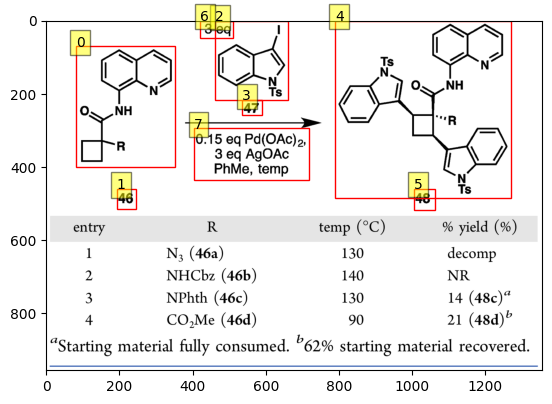

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[1, 5], [0, 6], [16, 7], [4, 8]]
tensor([False])
tensor([False])
tensor([False])
tensor([False])
[tensor([1166.0000,    6.4000, 1526.0000,  261.0000]), tensor([1295.,  258., 1442.,  328.]), tensor([473.0000,  94.6000, 688.6000, 268.6000]), tensor([518., 258., 631., 328.]), tensor([1983.6000,    4.3000, 2372.0000,  345.0000]), tensor([2031.,  261., 2172.,  337.]), tensor([1586.,  101., 1876.,  249.]), tensor([1676.,  255., 1814.,  339.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([473.0000,  94.6000, 688.6000, 268.6000]), tensor([518., 258., 631., 328.]), tensor([1166.0000,    6.4000, 1526.0000,  261.0000]), tensor([1295.,  258., 1442.,  328.]), tensor([1586.,  101., 1876.,  249.]), tensor([1676.,  255., 1814.,  339.]), tensor([1983.6000,    4.300

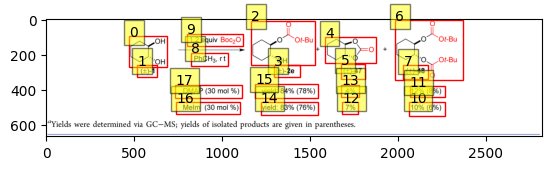

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[6, 31], [5, 32], [2, 33], [3, 34], [4, 35], [23, 11], [24, 22], [1, 21], [36, 20], [25, 19], [0, 18], [8, 16], [10, 17], [26, 15], [9, 12], [28, 13], [27, 14]]
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
[tensor([ 798.0000,  943.0000, 1199.1000, 1250.0000]), tensor([ 809., 1197.,  965., 1250.]), tensor([ 830.6000,  631.0000, 1207.3000,  924.0000]), tensor([823., 871., 993., 915.]), tensor([ 95.2000, 298.0000, 443.0000, 601.7000]), tensor([ 72., 544., 368., 614.]), tensor([556.6000, 324.8000, 823.0000, 606.7000]), tensor([460., 541., 742., 603.]), tensor([ 848.0000,  321.0000,

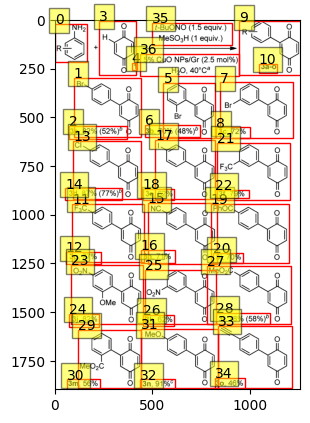

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[3, 8], [1, 5], [2, 6]]
tensor([False])
tensor([False])
tensor([False])
[tensor([285.4000,  28.0000, 465.2000, 307.0000]), tensor([451., 236., 485., 288.]), tensor([ 963.0000,    3.0000, 1315.9000,  304.9000]), tensor([1124.,  229., 1169.,  292.]), tensor([ 32.1000,  16.0000, 164.3000, 312.0000]), tensor([149., 239., 191., 290.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([ 32.1000,  16.0000, 164.3000, 312.0000]), tensor([149., 239., 191., 290.]), tensor([285.4000,  28.0000, 465.2000, 307.0000]), tensor([451., 236., 485., 288.]), tensor([ 963.0000,    3.0000, 1315.9000,  304.9000]), tensor([1124.,  229., 1169.,  292.]), tensor([549.0000, 204.0000, 932.9000, 263.7000]), tensor([545.,  42., 946., 155.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3),

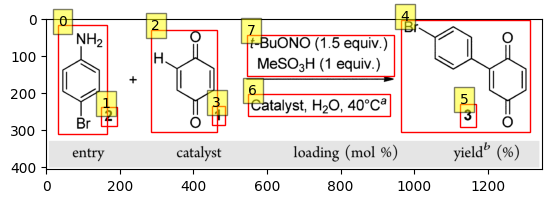

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[3, 10], [4, 9], [1, 8], [2, 7]]
tensor([False])
tensor([False])
tensor([False])
tensor([False])
[tensor([ 731.0000,    0.0000, 1313.3000,  268.0000]), tensor([856., 231., 951., 278.]), tensor([ 734.0000,  279.0000, 1311.0000,  548.7000]), tensor([862., 500., 953., 553.]), tensor([ 24.0000, 189.0000, 376.0000, 447.3000]), tensor([170.0000, 409.0000, 235.0000, 456.7000]), tensor([408.0000, 187.0000, 620.0000, 431.3000]), tensor([439., 442., 598., 500.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([ 24.0000, 189.0000, 376.0000, 447.3000]), tensor([170.0000, 409.0000, 235.0000, 456.7000]), tensor([408.0000, 187.0000, 620.0000, 431.3000]), tensor([439., 442., 598., 500.]), tensor([ 731.0000,    0.0000, 1313.3000,  268.0000]), tensor([856., 231., 951.,

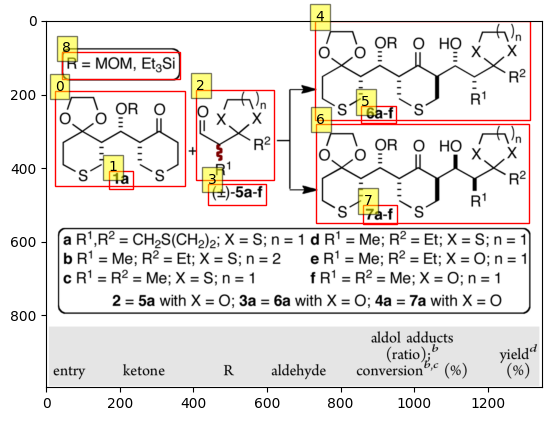

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[11, 15], [9, 10], [6, 4], [5, 12], [13, 7], [2, 8], [16, 3]]
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
tensor([False])
[tensor([ 23., 700., 166., 834.]), tensor([ 87., 835., 140., 873.]), tensor([  0., 436., 172., 563.]), tensor([ 87., 567., 142., 606.]), tensor([8.3100e+02, 1.0000e+00, 1.1960e+03, 2.1900e+02]), tensor([1003.,  171., 1036.,  212.]), tensor([373.,  52., 570., 182.]), tensor([445., 171., 476., 210.]), tensor([  2.,  24., 359., 207.]), tensor([152., 173., 206., 212.]), tensor([309., 408., 660., 560.]), tensor([440., 567., 492., 606.]), tensor([309., 686., 623., 883.]), tensor([438., 834., 493., 873.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3),

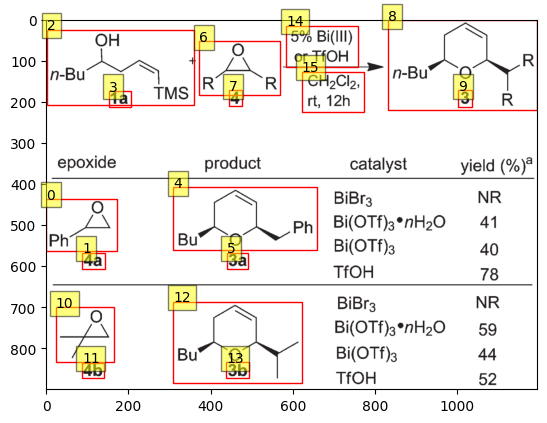

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[8, 3], [7, 2], [6, 5]]
tensor([False])
tensor([False])
tensor([False])
[tensor([1589.2000,  384.2000, 2050.3999,  712.4000]), tensor([1664.5400,  622.8700, 1768.3101,  682.1600]), tensor([1583.7000,    6.0000, 2049.2000,  325.8000]), tensor([1666.6600,  235.3400, 1774.6600,  290.4000]), tensor([ 807.9000,   57.8000, 1270.6001,  389.8000]), tensor([883.1300, 305.2200, 989.0100, 364.5200])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([ 807.9000,   57.8000, 1270.6001,  389.8000]), tensor([883.1300, 305.2200, 989.0100, 364.5200]), tensor([1583.7000,    6.0000, 2049.2000,  325.8000]), tensor([1666.6600,  235.3400, 1774.6600,  290.4000]), tensor([1589.2000,  384.2000, 2050.3999,  712.4000]), tensor([1664.5400,  622.8700, 1768.3101,  682.1600]), tensor([1380.7800,  262.8700, 

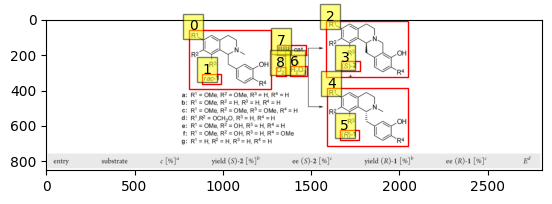

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[4, 7], [5, 8], [0, 1]]
tensor([False])
tensor([False])
tensor([False])
[tensor([ 994.2000,    4.0000, 1330.0000,  314.0000]), tensor([1062.,  267., 1107.,  307.]), tensor([ 16.,   6., 336., 206.]), tensor([138., 265., 189., 308.]), tensor([393., 123., 612., 212.]), tensor([443., 269., 491., 307.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([ 16.,   6., 336., 206.]), tensor([138., 265., 189., 308.]), tensor([393., 123., 612., 212.]), tensor([443., 269., 491., 307.]), tensor([ 994.2000,    4.0000, 1330.0000,  314.0000]), tensor([1062.,  267., 1107.,  307.]), tensor([650., 165., 952., 257.]), tensor([635.,  98., 946., 150.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(2), tensor(2)]
tensor(16.) tensor(6.)
tensor(138.) tensor(265.)
tensor(3

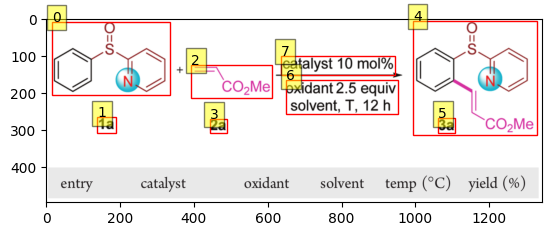

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[4, 2], [1, 0], [5, 7]]
tensor([False])
tensor([False])
tensor([False])
[tensor([274.7000,  31.0000, 812.3000, 141.9000]), tensor([483.8800, 128.5300, 621.9800, 175.0100]), tensor([  4.7000, 140.6000, 307.2000, 354.5000]), tensor([ 50.4000, 366.0000, 227.4000, 417.0000]), tensor([ 859.,    3., 1356.,  373.]), tensor([ 960.,  372., 1113.,  411.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([  4.7000, 140.6000, 307.2000, 354.5000]), tensor([ 50.4000, 366.0000, 227.4000, 417.0000]), tensor([274.7000,  31.0000, 812.3000, 141.9000]), tensor([483.8800, 128.5300, 621.9800, 175.0100]), tensor([ 859.,    3., 1356.,  373.]), tensor([ 960.,  372., 1113.,  411.]), tensor([427.0000, 278.0000, 765.8000, 336.2000]), tensor([266., 164., 857., 276.])]
[tensor(1), tensor(3), tensor(1), 

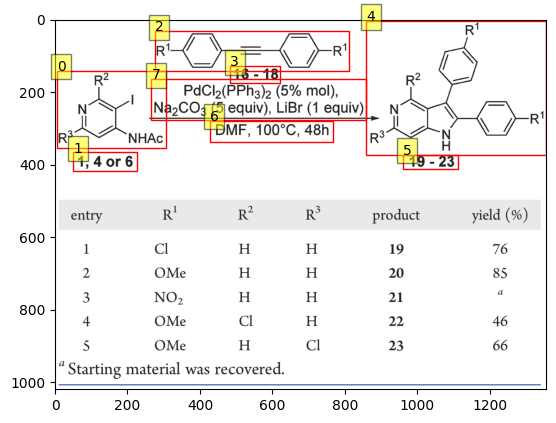

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[4, 3], [6, 1], [7, 2], [5, 0]]
tensor([False])
tensor([False])
tensor([False])
tensor([False])
[tensor([348.,   3., 730., 391.]), tensor([538.9100, 344.5400, 595.7800, 394.7200]), tensor([ 977.1000,  436.0000, 1352.0000,  827.6000]), tensor([1102.0000,  755.7000, 1166.0000,  821.3000]), tensor([ 951.0000,   10.0000, 1348.7000,  403.2000]), tensor([1144.4200,  354.5800, 1207.9801,  404.7600]), tensor([398.7000, 439.7000, 717.0000, 815.0000]), tensor([462.4000, 755.3000, 540.0000, 815.0000]), tensor([ 336.0000,  835.7000, 1191.0000, 1511.0000])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1)]
[tensor([348.,   3., 730., 391.]), tensor([538.9100, 344.5400, 595.7800, 394.7200]), tensor([398.7000, 439.7000, 717.0000, 815.0000]), tensor([462.4000, 755.300

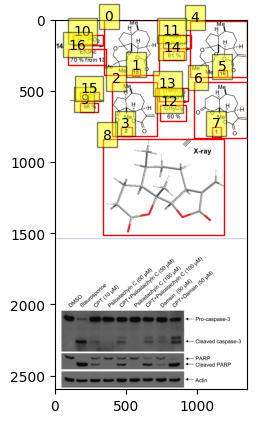

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[1, 6], [2, 7]]
tensor([False])
tensor([False])
[tensor([ 71.,   0., 461., 129.]), tensor([208., 154., 290., 199.]), tensor([ 870.,    0., 1279.,  219.]), tensor([1068.,  233., 1156.,  278.])]
[tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([ 71.,   0., 461., 129.]), tensor([208., 154., 290., 199.]), tensor([ 870.,    0., 1279.,  219.]), tensor([1068.,  233., 1156.,  278.]), tensor([ 869.3700,  165.4800, 1015.2700,  219.8700]), tensor([493.,   8., 792.,  62.]), tensor([489.,  99., 798., 221.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(2), tensor(2), tensor(2)]
tensor(71.) tensor(0.)
tensor(208.) tensor(154.)
tensor(870.) tensor(0.)
tensor(1068.) tensor(233.)
tensor(869.3700) tensor(165.4800)
tensor(493.) tensor(8.)
tensor(489.) tensor(99.)


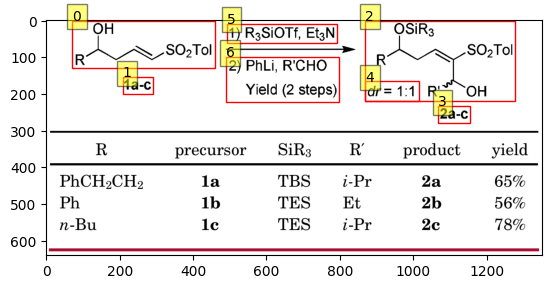

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[4, 3], [6, 1]]
tensor([False])
tensor([False])
[tensor([ 95.3000, 126.2000, 413.0000, 204.0000]), tensor([222., 305., 280., 350.]), tensor([ 982.2000,   79.1000, 1251.6000,  248.9000]), tensor([1090.,  305., 1148.,  353.])]
[tensor(1), tensor(3), tensor(1), tensor(3)]
[tensor([ 95.3000, 126.2000, 413.0000, 204.0000]), tensor([222., 305., 280., 350.]), tensor([ 982.2000,   79.1000, 1251.6000,  248.9000]), tensor([1090.,  305., 1148.,  353.]), tensor([511.,   4., 869., 151.]), tensor([521., 177., 856., 272.])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(2), tensor(2)]
tensor(95.3000) tensor(126.2000)
tensor(222.) tensor(305.)
tensor(982.2000) tensor(79.1000)
tensor(1090.) tensor(305.)
tensor(511.) tensor(4.)
tensor(521.) tensor(177.)


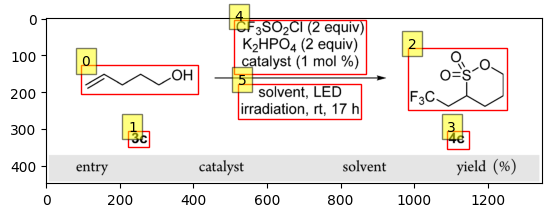

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[]
[tensor([ 345.6000, 1049.1000,  523.0000, 1182.7000]), tensor([1811.7000,  110.4000, 1975.2000,  238.1000]), tensor([1966.4000,  343.1000, 2239.7000,  615.8000]), tensor([1240.4000,    0.0000, 1560.2000,  183.1000]), tensor([583.4000, 347.0000, 852.2000, 610.1000]), tensor([ 254.4200, 1769.1500,  502.0700, 1950.3600]), tensor([ 932.9600, 1769.1500, 1168.5300, 1952.3800]), tensor([1647.7400, 1767.1400, 1885.3300, 1952.3800]), tensor([2328.2900, 1767.1400, 2549.7700, 1950.3600]), tensor([ 579.4000,  783.0000,  857.9000, 1055.3000]), tensor([ 932.0000, 1048.0000, 1093.9000, 1181.2000]), tensor([1969.2000,  785.0000, 2235.7000, 1054.5000]), tensor([2320.8000, 1054.2000, 2474.6001, 1184.0000]), tensor([1726.4000, 1056.0000, 1901.2001, 1179.5000]), tensor([ 893.2200, 1308.9200, 1224.5000, 1575.2200]), te

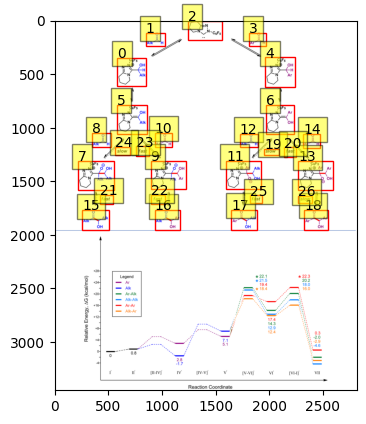

IndexError: list index out of range

In [17]:
def split_heuristic_helper(toprocess):
    maxy = 0 
    compress = []
    for pair in toprocess:
        if pair[1] == 1:
            compress.append([pair])
        else:
            compress[-1].append(pair)

    for pair in toprocess:
        if pair[0][1] > maxy and pair[1] == 1:
            maxy = pair[0][1]
    numbuckets = int(maxy//500 + 1)

    buckets = {}
    for i in range(numbuckets):
        buckets[i] = []

    for bbox_group in compress:
        buckets[int(bbox_group[0][0][1]//500)].append(bbox_group)

    for bucket in buckets:
        buckets[bucket] = sorted(buckets[bucket], key = lambda x: x[0][0][0])
    toreturn = []

    for bucket in buckets:
        for bbox_group in buckets[bucket]:
            toreturn+=bbox_group

    return toreturn

def coref_tokenize(boxes, labels, corefs, split_heuristic):
    coref_dict = {}
    for pair in corefs:
        if pair[0] in coref_dict:
            coref_dict[pair[0]].append(pair[1])
        else:
            coref_dict[pair[0]] = [pair[1]]
    #coref_dict = {pair[0]: pair[1] for pair in corefs}
    toreturn_boxes = []
    toreturn_labels = []
    
    for i, label in enumerate(labels):
        if i in coref_dict:
            toreturn_boxes.append(boxes[i])
            toreturn_labels.append(labels[i])
            for index in coref_dict[i]:
                
                toreturn_boxes.append(boxes[index])
                toreturn_labels.append(labels[index])
            print(labels[coref_dict[i]] == 2)
        elif label == 1:
            toreturn_boxes.append(boxes[i])
            toreturn_labels.append(labels[i])  
    '''
    for pair in corefs:
        for entry in pair:
            toreturn_boxes.append(boxes[entry])
            toreturn_labels.append(labels[entry])
    '''
    if split_heuristic:
        print(toreturn_boxes)
        print(toreturn_labels)
        returned = split_heuristic_helper(list(zip(toreturn_boxes, toreturn_labels)))
        toreturn_boxes = [r[0] for r in returned]
        toreturn_labels = [r[1] for r in returned]
    
    if True:
        for i, label in enumerate(labels): 
            if label == 2:
                toreturn_boxes.append(boxes[i])
                toreturn_labels.append(labels[i])
    return toreturn_boxes, toreturn_labels
    

for i in range(300):
    image1, target1 = train_dataset.load_and_prepare(i)
    plt.figure()
    plt.imshow(image1)
    print(target1.keys())
    print(target1['corefs'])
    data = target1['boxes']
    labels = target1['labels']
    toprocess = list(zip(data.tolist(), labels.tolist()))


    boxes, labels = coref_tokenize(target1['boxes'], target1['labels'], target1['corefs'], split_heuristic = True)
    print(boxes)
    print(labels)
    ax = plt.gca()
    for i, bbox in enumerate(boxes):
        xmin, ymin, xmax, ymax = bbox #* np.array([w, h, w, h])
        print(xmin, ymin)
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, color='r', linewidth=1))
        ax.text(xmin, ymin, str(i), fontsize=10, bbox=dict(facecolor='yellow', alpha=0.5))
    plt.show()